In [1]:
from utils import *
from external_packages import *

In [2]:
stackset=pd.read_csv(dataset_loc)
stackset.drop(['0'],axis=1,inplace=True)

In [3]:
stackset.head(3)

ID        ActionTime Action    Website  \
0  AMsySZbNg8SBwPtj7IGHnip_8aY0  1508761859495365   View  website_0   
1  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  1502847469736117   View  website_0   
2  AMsySZYoK8_bD0hGv4zu0iRn1TFo  1514169431528120   View  website_0   

  BannerSize    Brand  colour  InteractionTime  alexa_ranking_ca  \
0    300x600  brand_0    Pink         0.171601               0.0   
1    300x250  brand_1     Red         4.303945               0.0   
2     728x90  brand_2  Yellow         0.868106               0.0   

   alexa_ranking_com  
0                0.0  
1                0.0  
2                0.0

In [4]:
stackset.describe(include='all')

ID    ActionTime   Action    Website  \
count                        1000000  1.000000e+06  1000000    1000000   
unique                        218686           NaN        2         16   
top     AMsySZaSHnOuwfEjIHSMTU237tQS           NaN     View  website_0   
freq                            2231           NaN   999756     600137   
mean                             NaN  1.508367e+15      NaN        NaN   
std                              NaN  4.362784e+12      NaN        NaN   
min                              NaN  1.500991e+15      NaN        NaN   
25%                              NaN  1.505164e+15      NaN        NaN   
50%                              NaN  1.507718e+15      NaN        NaN   
75%                              NaN  1.511500e+15      NaN        NaN   
max                              NaN  1.517358e+15      NaN        NaN   

       BannerSize    Brand   colour  InteractionTime  alexa_ranking_ca  \
count     1000000  1000000  1000000    999992.000000         1000000.0   
unique         15       10        7              NaN               NaN   
top       300x250  brand_0     Pink              NaN               NaN   
freq       408705   222635   322837              NaN               NaN   
mean          NaN      NaN      NaN         0.998667               0.0   
std           NaN      NaN      NaN         0.998170               0.0   
min           NaN      NaN      NaN         0.000002               0.0   
25%           NaN      NaN      NaN         0.288696               0.0   
50%           NaN      NaN      NaN         0.693044               0.0   
75%           NaN      NaN      NaN         1.382822               0.0   
max           NaN      NaN      NaN        13.385281               0.0   

        alexa_ranking_com  
count           1000000.0  
unique                NaN  
top                   NaN  
freq                  NaN  
mean                  0.0  
std                   0.0  
min                   0.0  
25%                   0.0  
50%                   0.0  
75%                   0.0  
max                   0.0

In [5]:
get_info(stackset)

column  Missing  Duplicated  Unique     Type
0                 ID        0      781314  218686   object
1         ActionTime        0           3  999997    int64
2             Action        0      999998       2   object
3            Website        0      999984      16   object
4         BannerSize        0      999985      15   object
5              Brand        0      999990      10   object
6             colour        0      999993       7   object
7    InteractionTime        8         108  999892  float64
8   alexa_ranking_ca        0      999999       1  float64
9  alexa_ranking_com        0      999999       1  float64

In [6]:
stackset['Visits']=stackset.ID
stackset.Visits=stackset.Visits.map(stackset.groupby(['ID'])['ID'].count().to_dict())

In [7]:
stackset.Action.unique()

array(['View', 'Click'], dtype=object)

In [8]:
stackset['to_predict']=stackset.Action.map({'View':0,'Click':1})

In [9]:
stackset.columns

Index(['ID', 'ActionTime', 'Action', 'Website', 'BannerSize', 'Brand',
       'colour', 'InteractionTime', 'alexa_ranking_ca', 'alexa_ranking_com',
       'Visits', 'to_predict'],
      dtype='object')

In [10]:
columns_to_use=['ID','ActionTime','Website','BannerSize','Brand','colour','InteractionTime','alexa_ranking_ca', 'alexa_ranking_com',
       'Visits','to_predict']

In [11]:
init_stackset=stackset[columns_to_use]

In [12]:
init_stackset['TimeStamp']=pd.to_datetime(init_stackset['ActionTime'], unit='us')

In [13]:
init_stackset.head()

ID        ActionTime    Website BannerSize  \
0  AMsySZbNg8SBwPtj7IGHnip_8aY0  1508761859495365  website_0    300x600   
1  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  1502847469736117  website_0    300x250   
2  AMsySZYoK8_bD0hGv4zu0iRn1TFo  1514169431528120  website_0     728x90   
3  AMsySZahxpwLOWnMJj6RGATgwEOc  1515527952591896  website_0     320x50   
4  AMsySZbqgfMBDtAqZz1jVRaOmX00  1507514809374045  website_1    300x250   

     Brand  colour  InteractionTime  alexa_ranking_ca  alexa_ranking_com  \
0  brand_0    Pink         0.171601               0.0                0.0   
1  brand_1     Red         4.303945               0.0                0.0   
2  brand_2  Yellow         0.868106               0.0                0.0   
3  brand_0  Yellow         0.802647               0.0                0.0   
4  brand_3    Gold         0.627148               0.0                0.0   

   Visits  to_predict                  TimeStamp  
0      71           0 2017-10-23 12:30:59.495365  
1      13           0 2017-08-16 01:37:49.736117  
2       3           0 2017-12-25 02:37:11.528120  
3       2           0 2018-01-09 19:59:12.591896  
4      24           0 2017-10-09 02:06:49.374045

In [14]:
init_stackset['Year']=init_stackset['TimeStamp'].map(lambda x: x.year)
init_stackset['Month']=init_stackset['TimeStamp'].map(lambda x: x.month)
init_stackset['Day']=init_stackset['TimeStamp'].map(lambda x: x.day)
init_stackset['Hour']=init_stackset['TimeStamp'].map(lambda x: x.hour)
init_stackset['Minute']=init_stackset['TimeStamp'].map(lambda x: x.minute)

In [15]:
init_stackset['BannerSize'].unique()

array(['300x600', '300x250', '728x90', '320x50', '160x600', '1x1',
       'Other', '1200x627', '320x480', '300x50', '320x100', '768x1024',
       '1536x2048', '750x125', 'other'], dtype=object)

In [16]:
init_stackset.loc[init_stackset['BannerSize']=='other','BannerSize']='OtherxOther'
init_stackset.loc[init_stackset['BannerSize']=='Other','BannerSize']='OtherxOther'

In [17]:
init_stackset.groupby(['BannerSize'])[['ID']].count()

ID
BannerSize         
1200x627      32906
1536x2048       319
160x600       57558
1x1            8657
300x250      408705
300x50         1822
300x600       59280
320x100        1272
320x480        7114
320x50        62163
728x90       196219
750x125         572
768x1024       1167
OtherxOther  162246

In [18]:
init_stackset['BannerWidth']=init_stackset['BannerSize'].map(lambda x: x.split('x')[0])

In [19]:
init_stackset['BannerHeight']=init_stackset['BannerSize'].map(lambda x: x.split('x')[1] if (len(x.split('x'))>1) else 'other')

In [20]:
init_stackset['USHoliday']=init_stackset['TimeStamp'].map(lambda x: 1 if(x in us_holidays) else 0)
init_stackset['CAHoliday']=init_stackset['TimeStamp'].map(lambda x: 1 if(x in ca_holidays) else 0)
init_stackset['UKHoliday']=init_stackset['TimeStamp'].map(lambda x: 1 if(x in uk_holidays) else 0)

In [21]:
init_stackset['WeekDay']=init_stackset['TimeStamp'].map(lambda x: x.weekday())

In [22]:
sec_stackset=init_stackset.drop(['ActionTime','BannerSize'],axis=1)

In [23]:
sec_stackset.head()

ID    Website    Brand  colour  InteractionTime  \
0  AMsySZbNg8SBwPtj7IGHnip_8aY0  website_0  brand_0    Pink         0.171601   
1  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  website_0  brand_1     Red         4.303945   
2  AMsySZYoK8_bD0hGv4zu0iRn1TFo  website_0  brand_2  Yellow         0.868106   
3  AMsySZahxpwLOWnMJj6RGATgwEOc  website_0  brand_0  Yellow         0.802647   
4  AMsySZbqgfMBDtAqZz1jVRaOmX00  website_1  brand_3    Gold         0.627148   

   alexa_ranking_ca  alexa_ranking_com  Visits  to_predict  \
0               0.0                0.0      71           0   
1               0.0                0.0      13           0   
2               0.0                0.0       3           0   
3               0.0                0.0       2           0   
4               0.0                0.0      24           0   

                   TimeStamp  ...  Month  Day  Hour  Minute  BannerWidth  \
0 2017-10-23 12:30:59.495365  ...     10   23    12      30          300   
1 2017-08-16 01:37:49.736117  ...      8   16     1      37          300   
2 2017-12-25 02:37:11.528120  ...     12   25     2      37          728   
3 2018-01-09 19:59:12.591896  ...      1    9    19      59          320   
4 2017-10-09 02:06:49.374045  ...     10    9     2       6          300   

  BannerHeight USHoliday  CAHoliday  UKHoliday  WeekDay  
0          600         0          0          0        0  
1          250         0          0          0        2  
2           90         1          1          1        0  
3           50         0          0          0        1  
4          250         1          1          0        0  

[5 rows x 21 columns]

In [24]:
sec_stackset.groupby(['to_predict'])['to_predict'].count()

to_predict
0    999756
1       244
Name: to_predict, dtype: int64

In [25]:
sec_stackset.groupby(['to_predict'])['InteractionTime'].sum()

to_predict
0    998415.210547
1       244.158784
Name: InteractionTime, dtype: float64

In [26]:
sec_stackset.groupby(['to_predict'])['InteractionTime'].mean()

to_predict
0    0.998662
1    1.021585
Name: InteractionTime, dtype: float64

In [27]:
sec_stackset.groupby(['to_predict'])['InteractionTime'].median()

to_predict
0    0.693022
1    0.739686
Name: InteractionTime, dtype: float64

In [28]:
median_grouped=sec_stackset.groupby(['to_predict','Website','Brand','colour'])['InteractionTime'].median().add_suffix('').reset_index()

In [29]:
median_grouped.head()

to_predict    Website    Brand colour  InteractionTime
0          0  website_0  brand_0   Blue         0.701090
1          0  website_0  brand_0   Gold         0.695368
2          0  website_0  brand_0   Pink         0.685878
3          0  website_0  brand_0    Red         0.687508
4          0  website_0  brand_0  White         0.694147

In [30]:
len(sec_stackset[sec_stackset.InteractionTime.isnull()])

8

In [31]:
sec_stackset[sec_stackset.InteractionTime.isnull()]

ID    Website    Brand  colour  \
28      AMsySZbU2U0u2CDEQPae5UEvj7uh  website_0  brand_3    Gold   
154     AMsySZZNSd4doewEvAFWe9U7SEub  website_0  brand_7    Gold   
812     AMsySZb8b-J-eW7JOEuTeIUQ5qMg  website_2  brand_6   other   
98269   AMsySZbCULOmzvMOl_jxgAPZnhmV  website_0  brand_2    Blue   
243356  AMsySZYtpCq1jCDG6_MR6U9RDbfC  website_0  brand_6    Pink   
243357  AMsySZa6M_Z79mOnUWF9P8nKac5-  website_0  brand_0  Yellow   
331970  AMsySZbyqkZuERDU8VBWoJX_F4tD  website_6  brand_5    Pink   
451827  AMsySZYZjTd1kTYooOpACb0cTDL2  website_0  brand_5    Pink   

        InteractionTime  alexa_ranking_ca  alexa_ranking_com  Visits  \
28                  NaN               0.0                0.0      44   
154                 NaN               0.0                0.0      20   
812                 NaN               0.0                0.0      21   
98269               NaN               0.0                0.0      27   
243356              NaN               0.0                0.0       4   
243357              NaN               0.0                0.0      23   
331970              NaN               0.0                0.0       2   
451827              NaN               0.0                0.0      48   

        to_predict                  TimeStamp  ...  Month  Day  Hour  Minute  \
28               0 2017-12-22 20:27:28.167954  ...     12   22    20      27   
154              0 2017-08-29 01:03:04.487308  ...      8   29     1       3   
812              1 2017-12-26 04:09:13.516880  ...     12   26     4       9   
98269            1 2017-12-06 15:18:38.334683  ...     12    6    15      18   
243356           1 2017-12-31 05:28:57.892676  ...     12   31     5      28   
243357           0 2018-01-23 20:15:55.981098  ...      1   23    20      15   
331970           1 2018-01-06 22:36:57.655536  ...      1    6    22      36   
451827           1 2018-01-11 17:49:30.262672  ...      1   11    17      49   

        BannerWidth BannerHeight USHoliday  CAHoliday  UKHoliday  WeekDay  
28              728           90         0          0          0        4  
154             320           50         0          0          0        1  
812             160          600         0          1          1        1  
98269           300          250         0          0          0        2  
243356          160          600         0          0          0        6  
243357          300          250         0          0          0        1  
331970            1            1         0          0          0        5  
451827          728           90         0          0          0        3  

[8 rows x 21 columns]

In [32]:
target_columns=['to_predict','Website','Brand','colour']
sec_stackset.loc[sec_stackset.InteractionTime.isnull()]=sec_stackset[sec_stackset.InteractionTime.isnull()].apply(lambda x: 
                                                                replace_values_new(x,median_grouped,target_columns),axis=1)

In [33]:
get_info(sec_stackset)

column  Missing  Duplicated  Unique            Type
0                  ID        0      781314  218686          object
1             Website        0      999984      16          object
2               Brand        0      999990      10          object
3              colour        0      999993       7          object
4     InteractionTime        0         108  999892         float64
5    alexa_ranking_ca        0      999999       1         float64
6   alexa_ranking_com        0      999999       1         float64
7              Visits        0      999689     311           int64
8          to_predict        0      999998       2           int64
9           TimeStamp        0           3  999997  datetime64[ns]
10               Year        0      999998       2           int64
11              Month        0      999993       7           int64
12                Day        0      999969      31           int64
13               Hour        0      999976      24           int64
14             Minute        0      999940      60           int64
15        BannerWidth        0      999990      10          object
16       BannerHeight        0      999988      12          object
17          USHoliday        0      999998       2           int64
18          CAHoliday        0      999998       2           int64
19          UKHoliday        0      999998       2           int64
20            WeekDay        0      999993       7           int64

In [100]:
sec_stackset.to_predict.unique()

array([0, 1], dtype=int64)

In [142]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

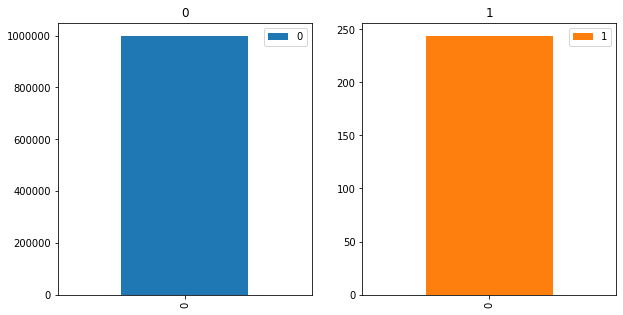

In [140]:

fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)
axes=axes.ravel()
pd.DataFrame([sec_stackset.to_predict.value_counts()]).reset_index(drop=True).plot.bar(subplots=True,ax=axes);

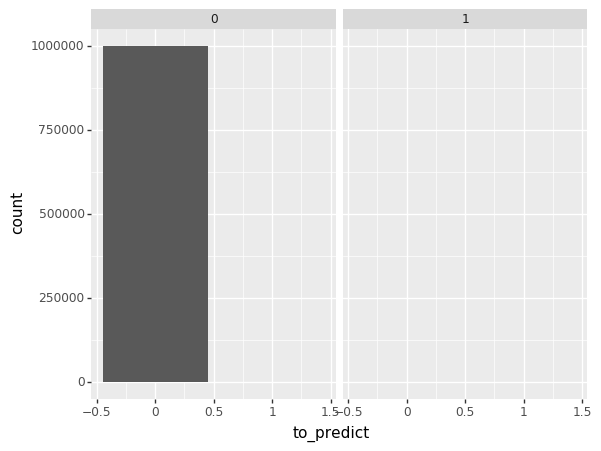

<ggplot: (-9223371892641742136)>

In [40]:
ggplot(sec_stackset,aes('to_predict'))+\
geom_bar()+facet_wrap('~to_predict')

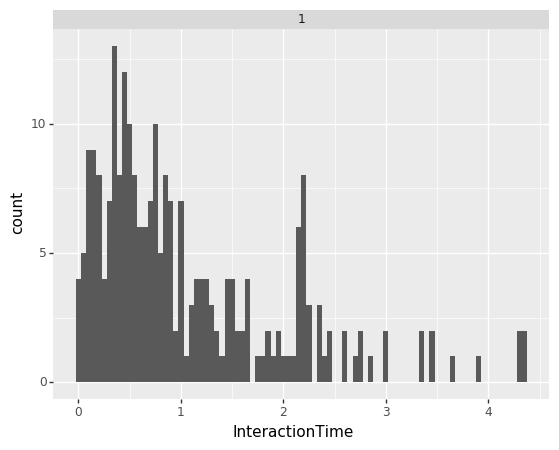

<ggplot: (-9223371893264202685)>

In [149]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('InteractionTime'))+\
geom_histogram(bins=30,binwidth=.05)+facet_wrap('~to_predict')

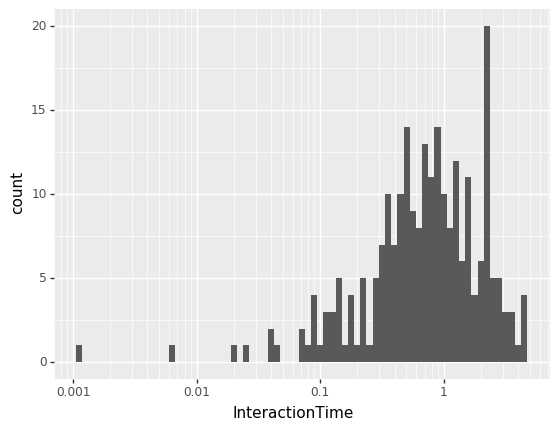

<ggplot: (-9223371893374504188)>

In [150]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('InteractionTime'))+\
geom_histogram(bins=30,binwidth=.05)+scale_x_log10()

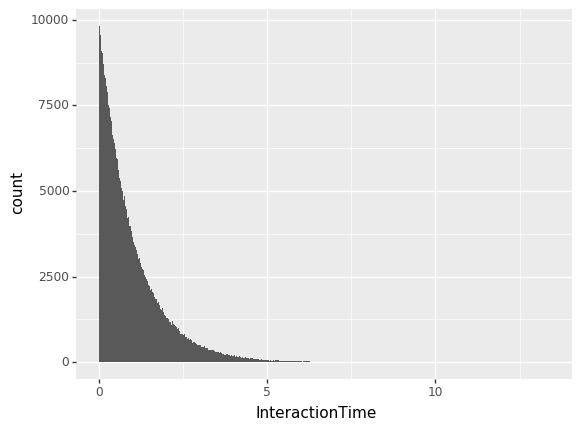

<ggplot: (143480263614)>

In [151]:
ggplot(sec_stackset[sec_stackset.to_predict==0],aes('InteractionTime'))+\
geom_histogram(bins=30,binwidth=.01)

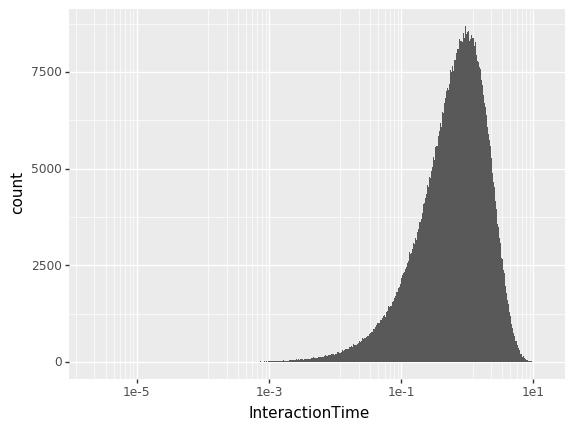

<ggplot: (-9223371893374238674)>

In [152]:
ggplot(sec_stackset[sec_stackset.to_predict==0],aes('InteractionTime'))+\
geom_histogram(bins=30,binwidth=.01)+scale_x_log10()

In [153]:
sec_stackset['log_InteractionTime']=np.log(sec_stackset['InteractionTime'])

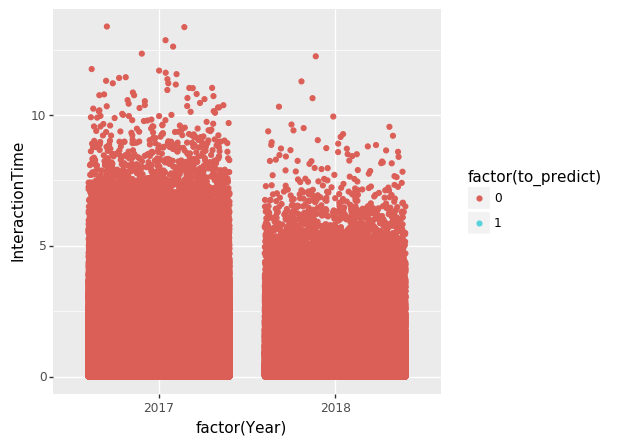

<ggplot: (-9223371892528349948)>

In [73]:
ggplot(sec_stackset,aes('factor(Year)','InteractionTime',show_legend=False,color='factor(to_predict)'))+\
geom_jitter()+theme(figure_size=(5, 5))

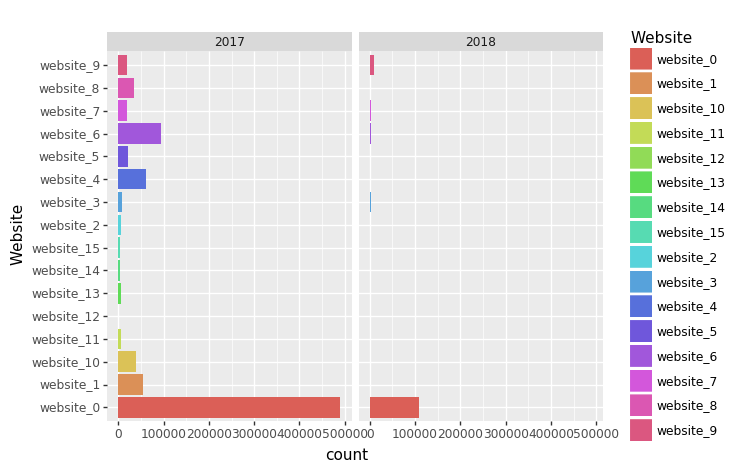

<ggplot: (144339281286)>

In [74]:
ggplot(sec_stackset[sec_stackset.to_predict==0],aes('Website',fill='Website'))+geom_bar()+coord_flip()+facet_wrap('~Year')

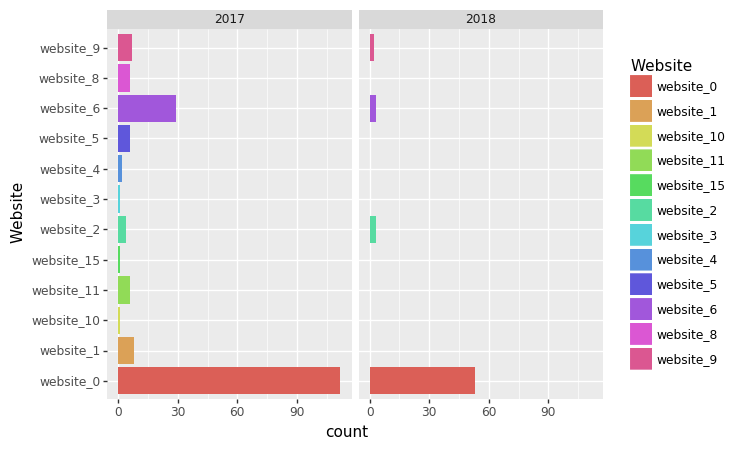

<ggplot: (144326518157)>

In [75]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('Website',fill='Website'))+geom_bar()+coord_flip()+facet_wrap('~Year')

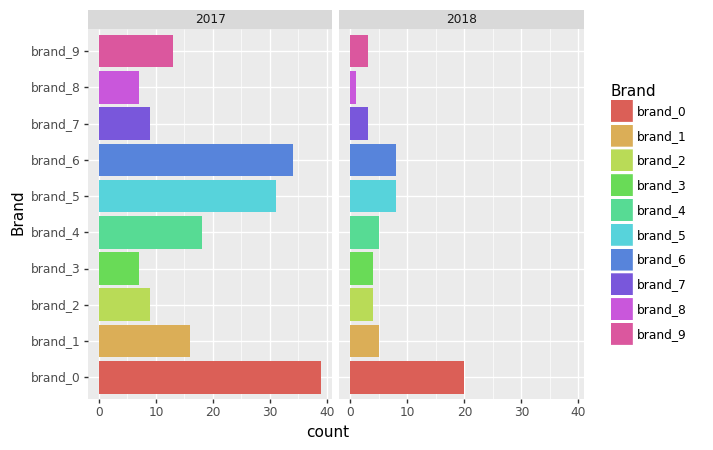

<ggplot: (-9223371892527978566)>

In [76]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('Brand',fill='Brand'))+geom_bar()+coord_flip()+facet_wrap('~Year')

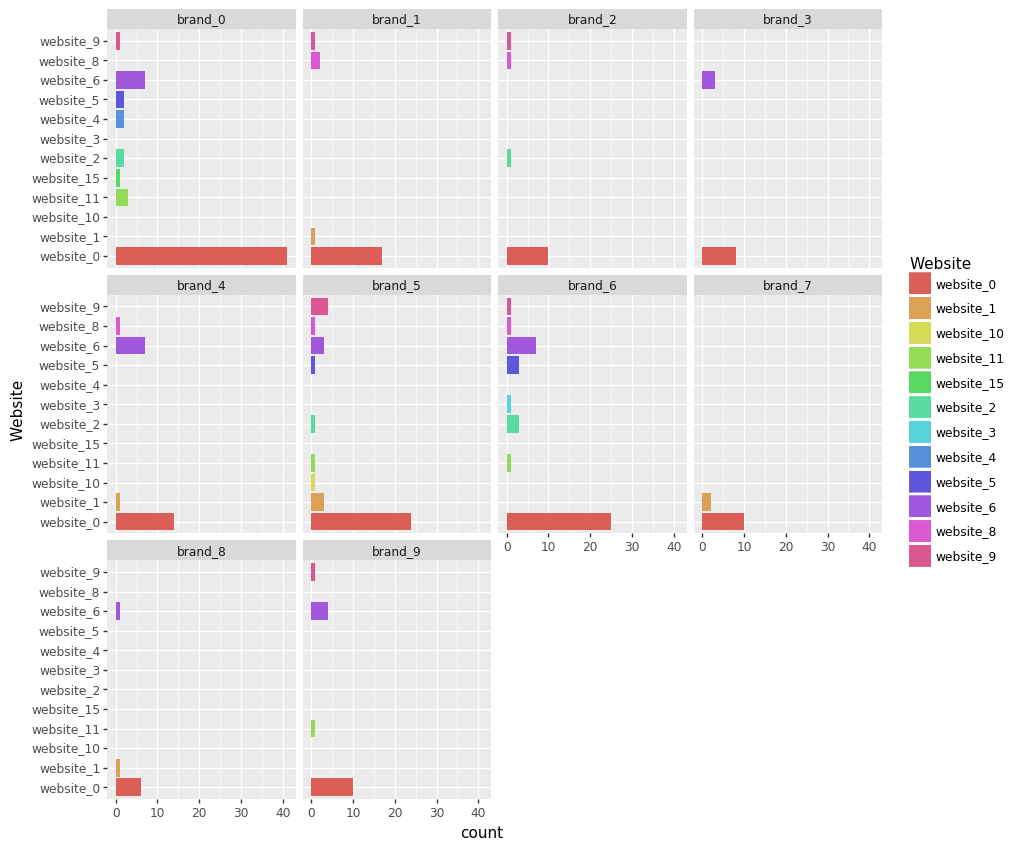

<ggplot: (144326885510)>

In [77]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('Website',fill='Website'))+geom_bar()+coord_flip()+facet_wrap('~Brand')+\
theme(figure_size=(10, 10))

In [158]:
agg_0=sec_stackset.groupby(['Year','Month','to_predict'])['InteractionTime'].mean().reset_index().\
sort_values(['Year','Month','InteractionTime'])

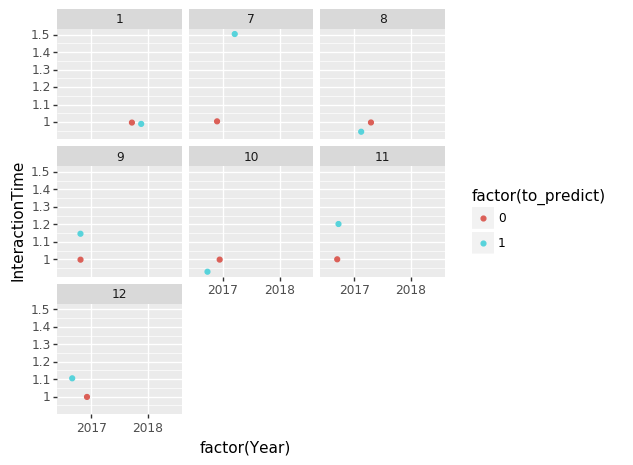

<ggplot: (143505256768)>

In [159]:
ggplot(agg_0,aes('factor(Year)','InteractionTime',show_legend=False,color='factor(to_predict)'))+\
geom_jitter()+theme(figure_size=(5, 5))+facet_wrap('~Month')

In [160]:
agg_1=sec_stackset.groupby(['Year','Month','Day','to_predict','WeekDay','USHoliday','CAHoliday',
                           'UKHoliday'])['InteractionTime'].mean().reset_index()

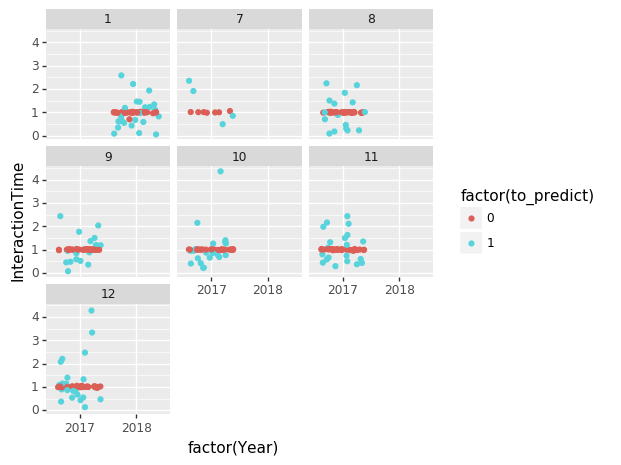

<ggplot: (-9223371893344820988)>

In [161]:
ggplot(agg_1,aes('factor(Year)','InteractionTime',show_legend=False,color='factor(to_predict)'))+\
geom_jitter()+theme(figure_size=(5, 5))+facet_wrap('~Month')

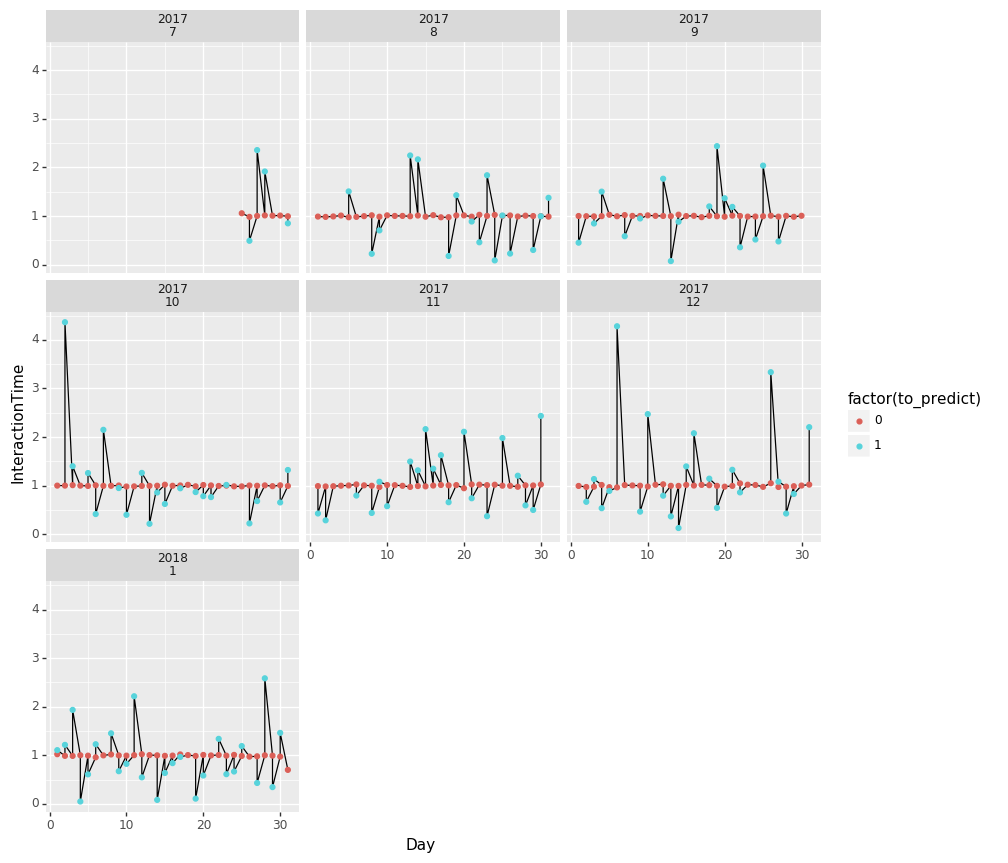

<ggplot: (-9223371893266393077)>

In [162]:
ggplot(agg_1,aes('Day','InteractionTime',show_legend=False))+geom_line()+facet_wrap('~Year+Month')+theme(figure_size=(10, 10))+\
geom_point(aes(color='factor(to_predict)',show_legend=False))

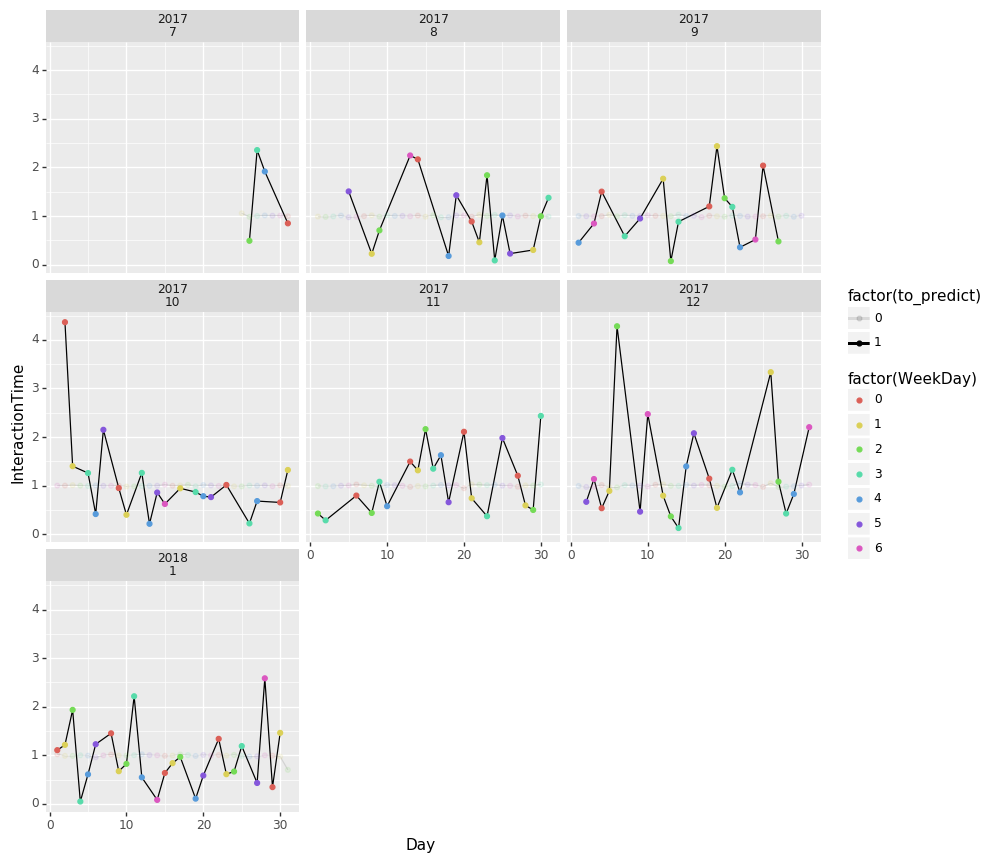

<ggplot: (143597935652)>

In [163]:
ggplot(agg_1,aes('Day','InteractionTime',show_legend=False,alpha='factor(to_predict)'))+geom_line()+facet_wrap('~Year+Month')+theme(figure_size=(10, 10))+\
geom_point(aes(color='factor(WeekDay)',show_legend=False))

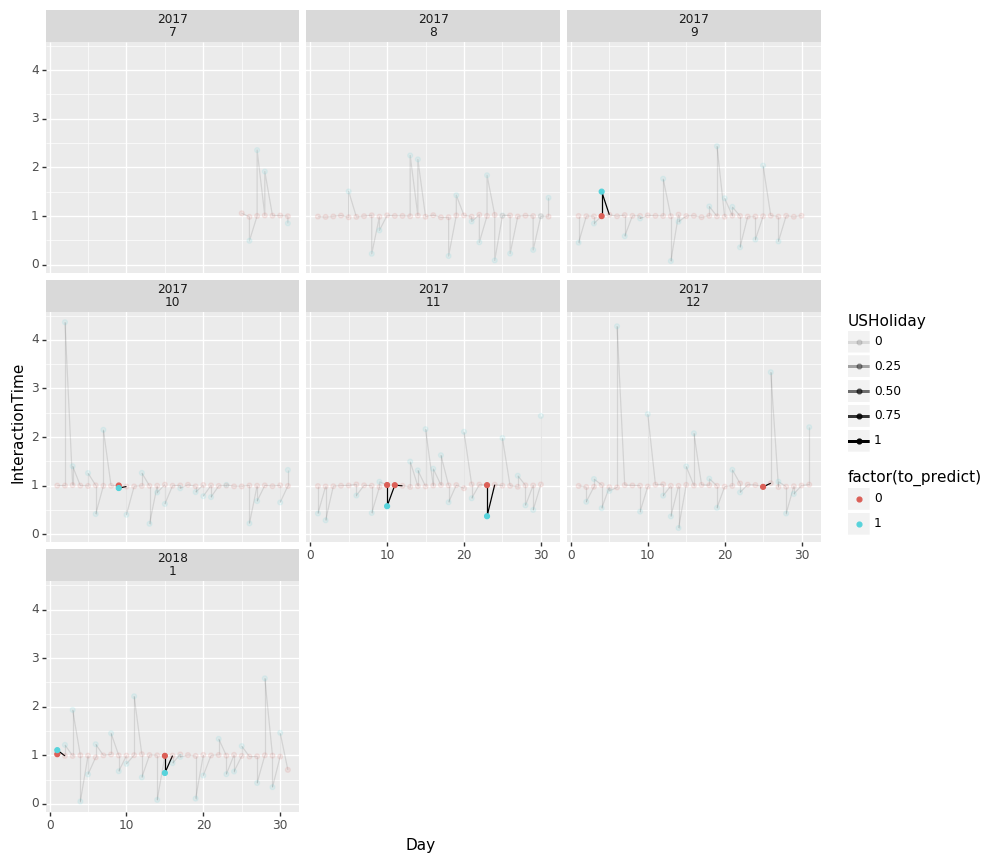

<ggplot: (-9223371893247512793)>

In [164]:
ggplot(agg_1,aes('Day','InteractionTime',show_legend=False,alpha='USHoliday'))+geom_line()+facet_wrap('~Year+Month')+theme(figure_size=(10, 10))+\
geom_point(aes(color='factor(to_predict)',show_legend=False))

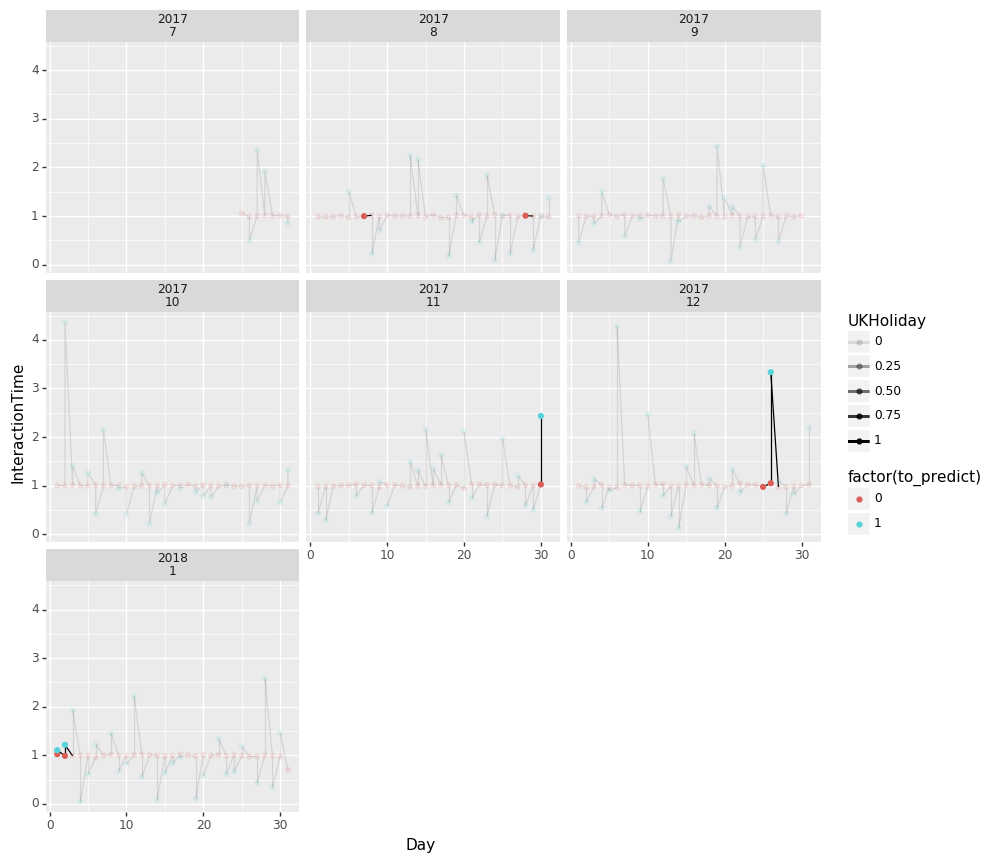

<ggplot: (143607220828)>

In [165]:
ggplot(agg_1,aes('Day','InteractionTime',show_legend=False,alpha='UKHoliday'))+geom_line()+facet_wrap('~Year+Month')+theme(figure_size=(10, 10))+\
geom_point(aes(color='factor(to_predict)',show_legend=False))

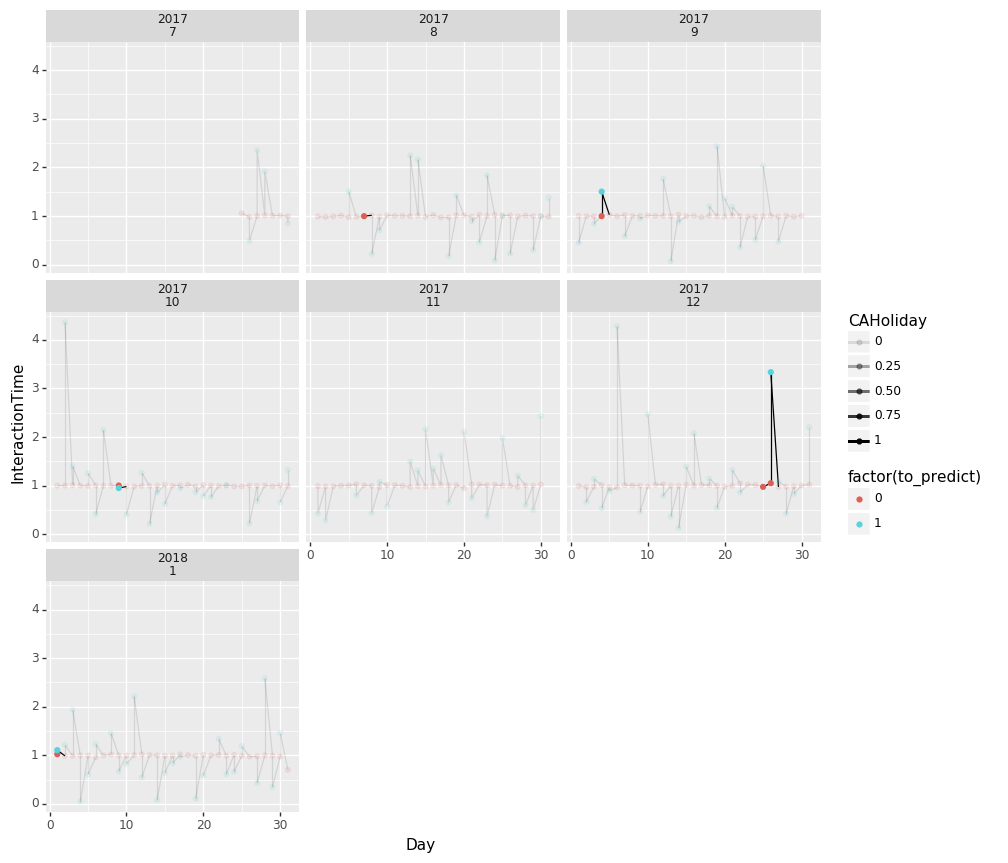

<ggplot: (-9223371893244018288)>

In [166]:
ggplot(agg_1,aes('Day','InteractionTime',show_legend=False,alpha='CAHoliday'))+geom_line()+facet_wrap('~Year+Month')+theme(figure_size=(10, 10))+\
geom_point(aes(color='factor(to_predict)',show_legend=False))

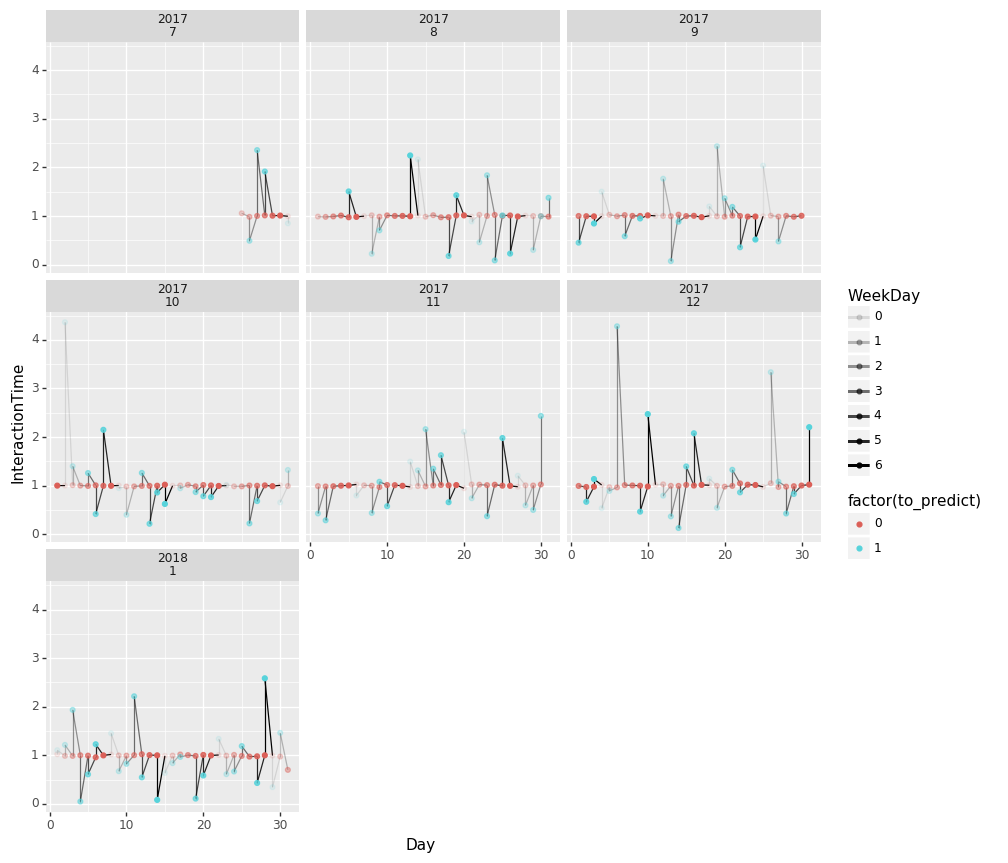

<ggplot: (-9223371893224511621)>

In [167]:
ggplot(agg_1,aes('Day','InteractionTime',show_legend=False,alpha='WeekDay'))+geom_line()+facet_wrap('~Year+Month')+theme(figure_size=(10, 10))+\
geom_point(aes(color='factor(to_predict)',show_legend=False))

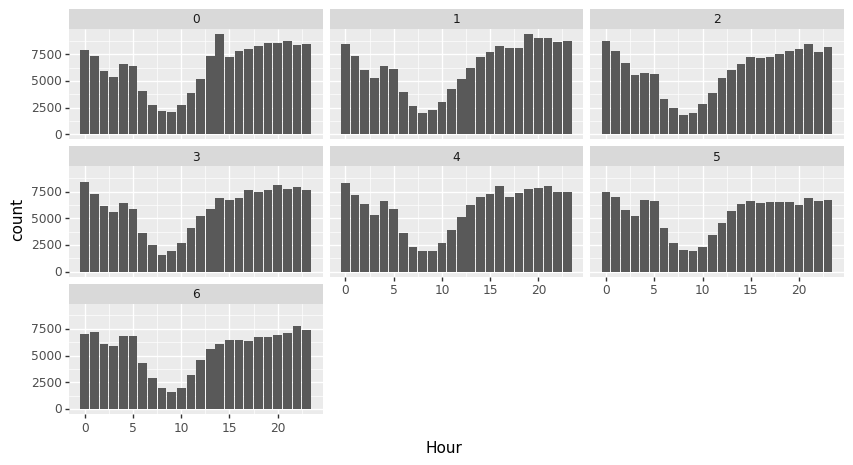

<ggplot: (143509915726)>

In [168]:
ggplot(sec_stackset,aes('Hour'))+geom_bar()+facet_wrap('~WeekDay')+theme(figure_size=(10,5))

In [169]:
agg_1_0=sec_stackset.groupby(['Hour'])['to_predict'].sum().reset_index()

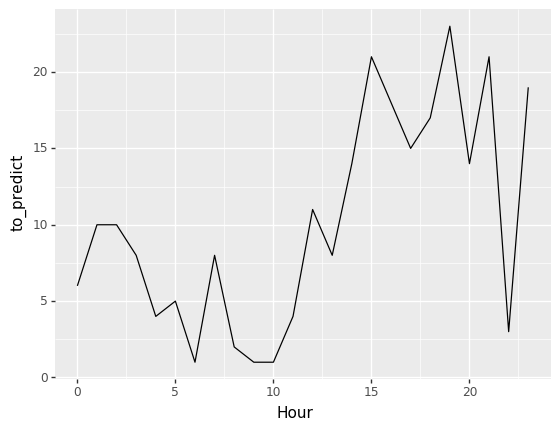

<ggplot: (-9223371893374483147)>

In [170]:
ggplot(agg_1_0,aes('Hour','to_predict'))+geom_line()

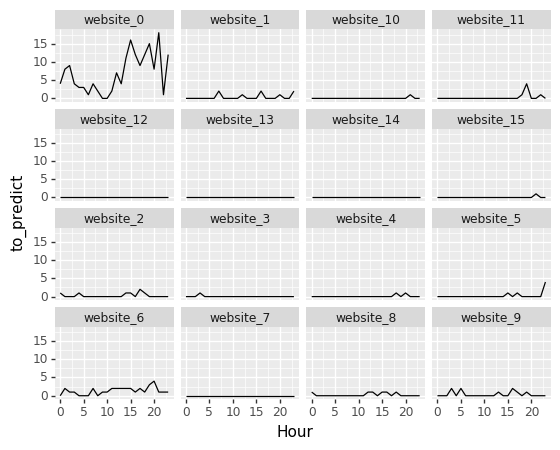

<ggplot: (-9223371893374510311)>

In [171]:
agg_1_00=sec_stackset.groupby(['Hour','Website'])['to_predict'].sum().reset_index()
ggplot(agg_1_00,aes('Hour','to_predict'))+geom_line()+facet_wrap('Website')

In [172]:
agg_1_1=sec_stackset.groupby(['Year','Month','Day','Hour','to_predict','WeekDay','USHoliday','CAHoliday',
                           'UKHoliday'])['InteractionTime'].mean().reset_index()

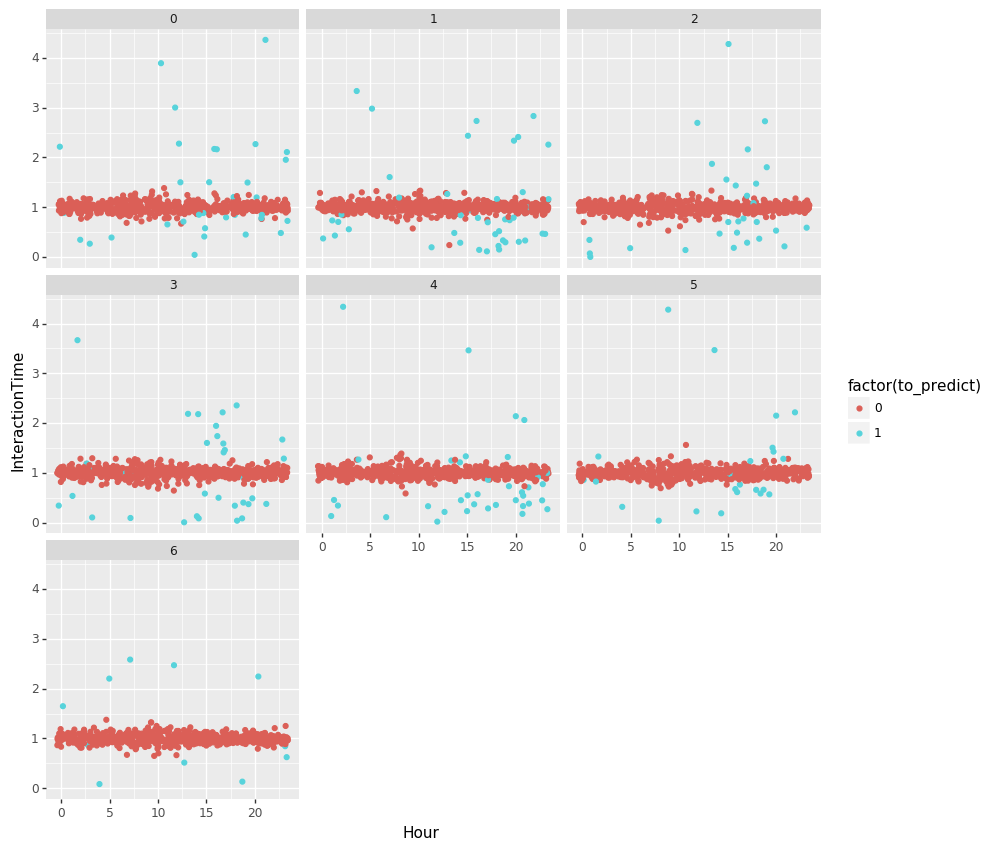

<ggplot: (-9223371893200152902)>

In [173]:
ggplot(agg_1_1,aes('Hour','InteractionTime',color='factor(to_predict)'))+geom_jitter()+facet_wrap('~WeekDay')+\
theme(figure_size=(10, 10))

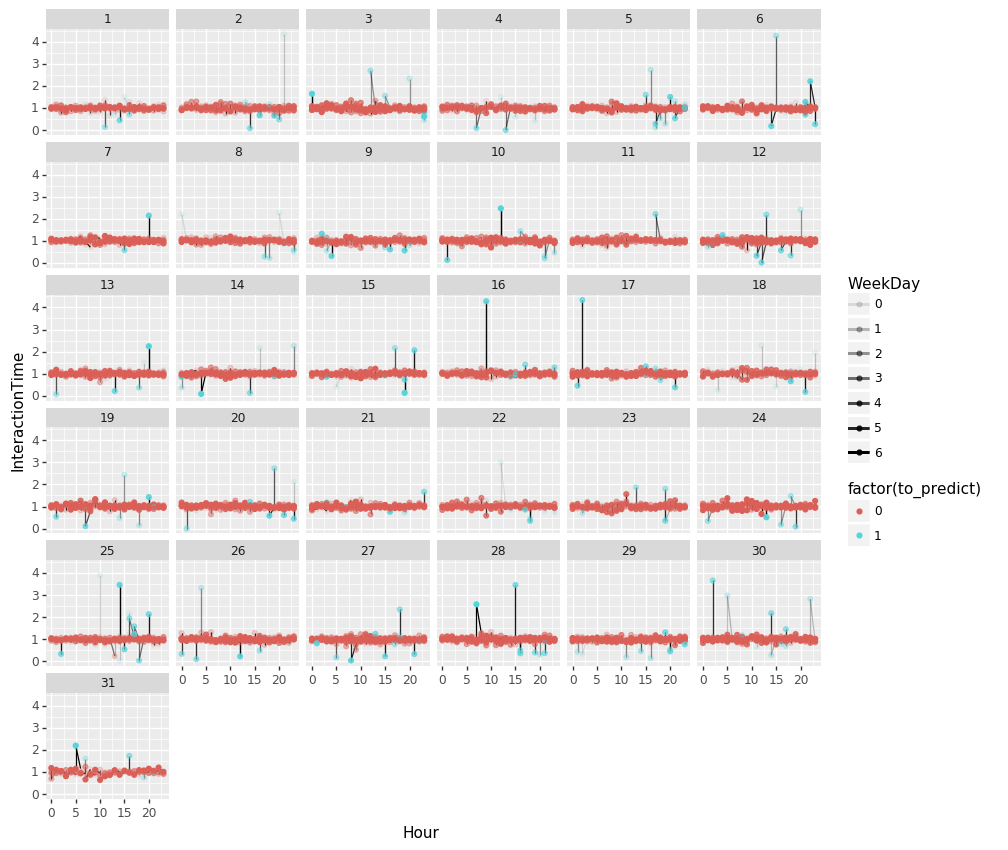

<ggplot: (-9223371893344977916)>

In [174]:
ggplot(agg_1_1,aes('Hour','InteractionTime',show_legend=False,alpha='WeekDay'))+geom_line()+theme(figure_size=(10, 10))+\
geom_point(aes(color='factor(to_predict)',show_legend=False))+facet_wrap('~Day')

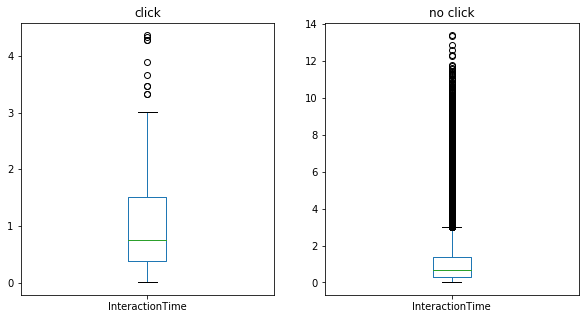

In [86]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax=ax.ravel()
sec_stackset[sec_stackset.to_predict==1].InteractionTime.plot.box(ax=ax[0],title="click")
sec_stackset[sec_stackset.to_predict==0].InteractionTime.plot.box(ax=ax[1],title="no click")

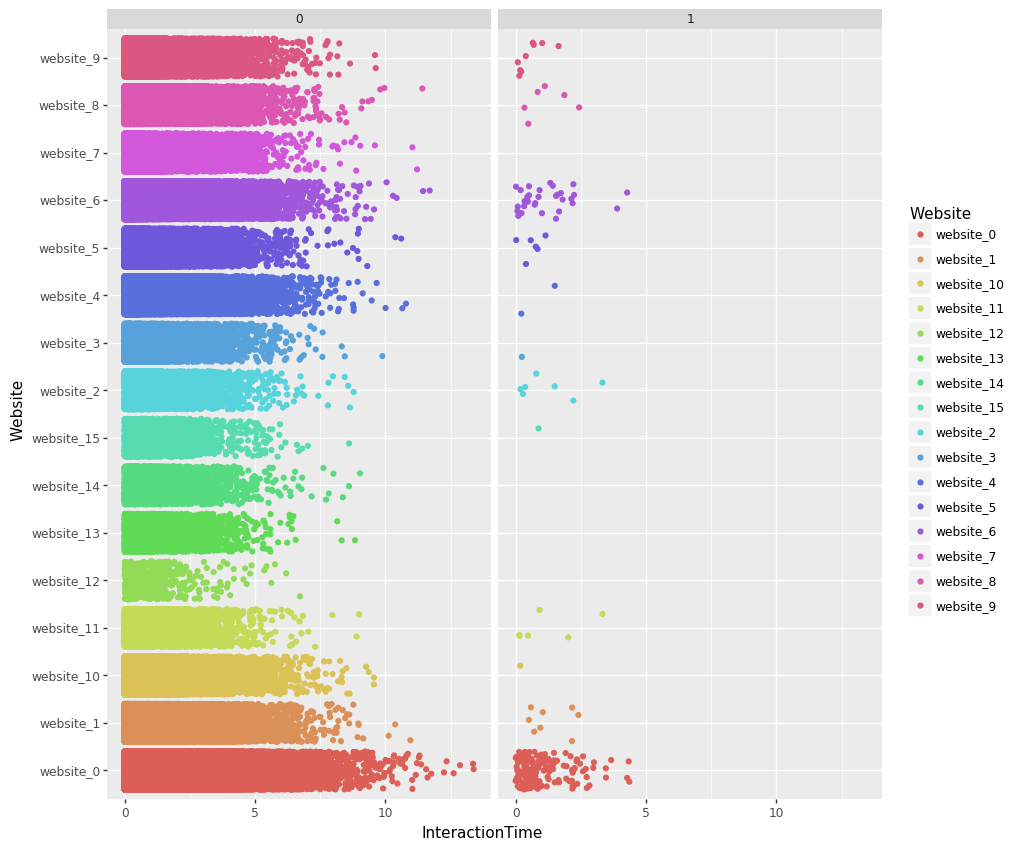

<ggplot: (143654231749)>

In [176]:
ggplot(sec_stackset,aes('Website','InteractionTime',color='Website'))+geom_jitter()+\
theme(figure_size=(10, 10))+coord_flip()+facet_wrap('~to_predict')

In [177]:
agg_3=sec_stackset.groupby(['Website','to_predict','Year','Month','WeekDay'])['InteractionTime'].mean().reset_index()

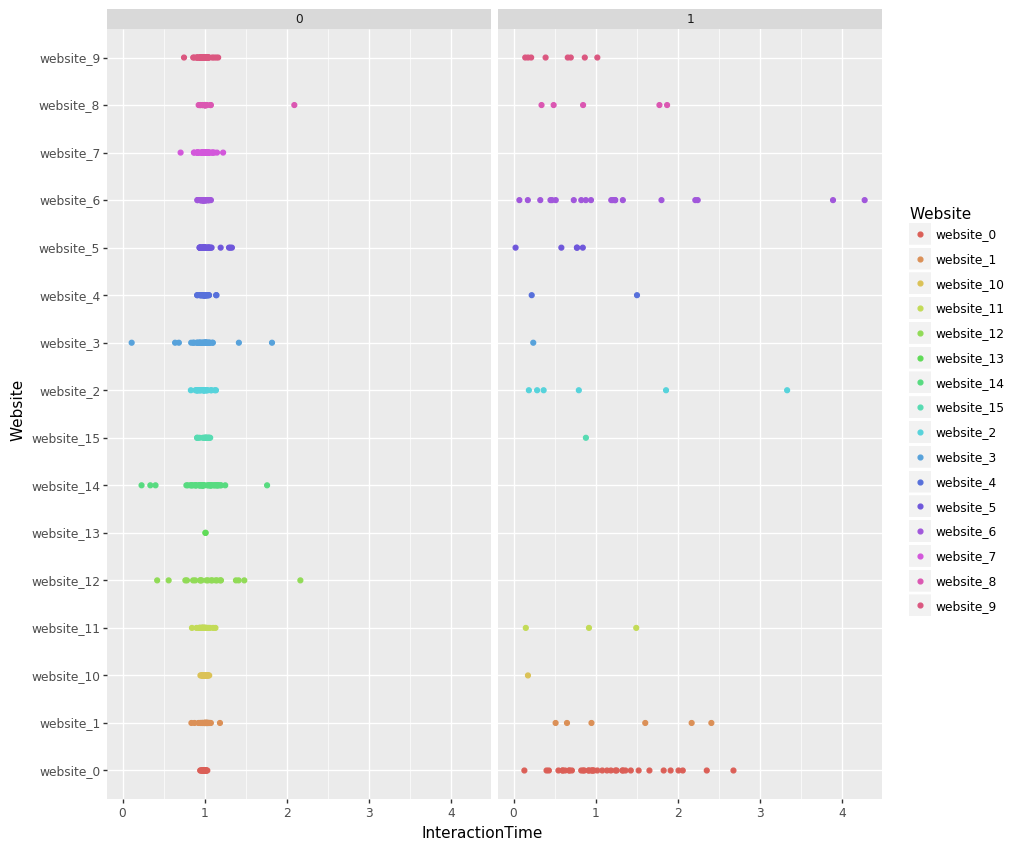

<ggplot: (-9223371893166377454)>

In [178]:
ggplot(agg_3,aes('Website','InteractionTime',color='Website'))+geom_point()+\
theme(figure_size=(10, 10))+coord_flip()+facet_wrap('~to_predict')

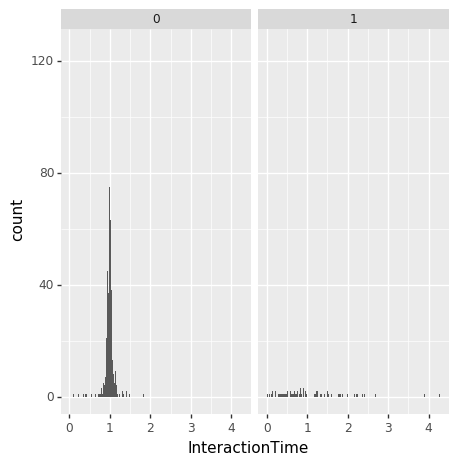

<ggplot: (-9223371893200068450)>

In [179]:
ggplot(agg_3,aes('InteractionTime'))+geom_histogram()+facet_wrap('~to_predict')+\
theme(figure_size=(5,5))

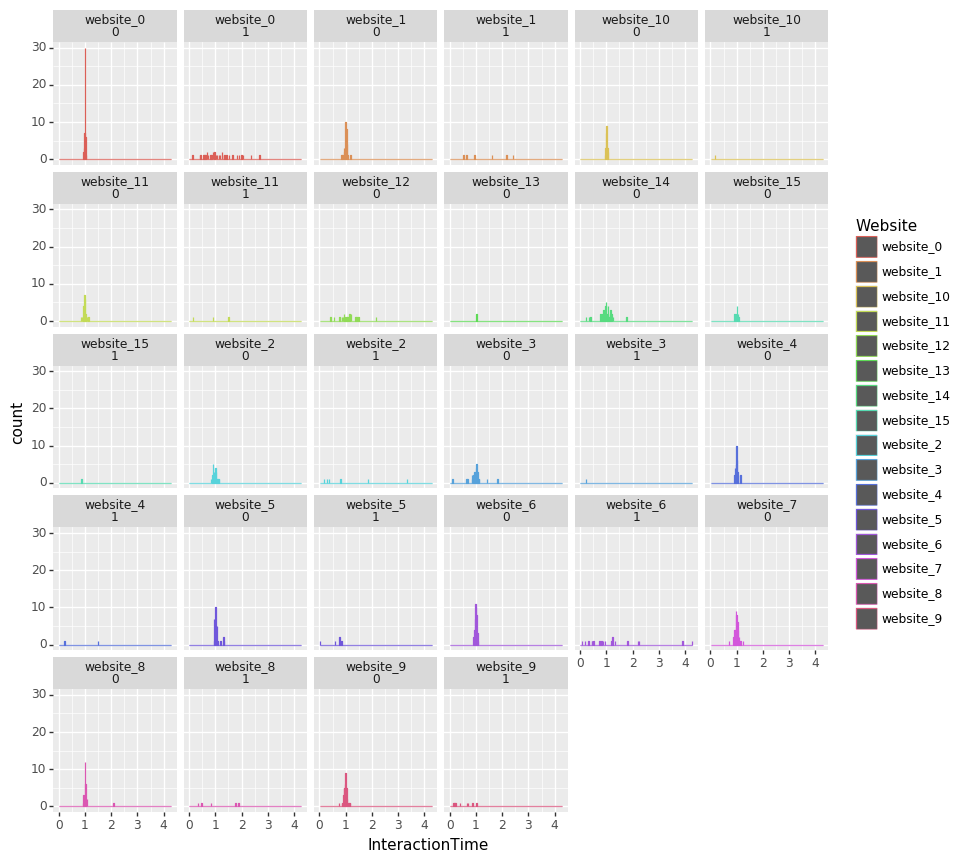

<ggplot: (-9223371893199997664)>

In [180]:
ggplot(agg_3,aes('InteractionTime',color='Website'))+geom_histogram()+facet_wrap('~Website+to_predict')+\
theme(figure_size=(10, 10))

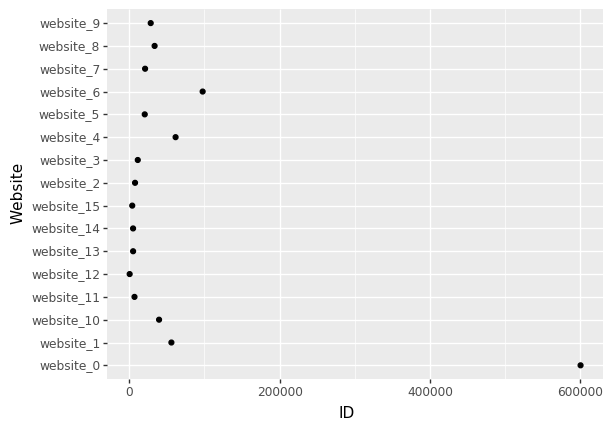

<ggplot: (143607236160)>

In [181]:
ggplot(sec_stackset.groupby(['Website'])['ID'].count().reset_index(),aes('Website','ID'))+geom_point()+coord_flip()

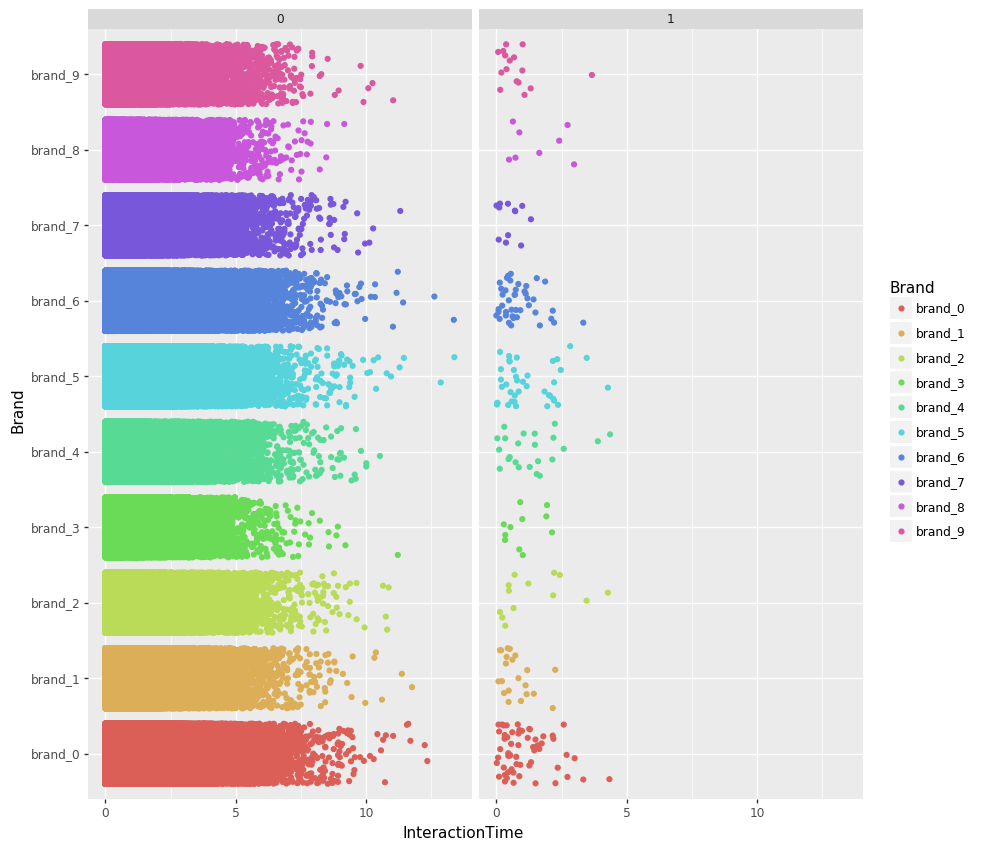

<ggplot: (-9223371893200544091)>

In [182]:
ggplot(sec_stackset,aes('Brand','InteractionTime',color='Brand'))+geom_jitter()+\
theme(figure_size=(10, 10))+coord_flip()+facet_wrap('~to_predict')

In [183]:
agg_4=sec_stackset.groupby(['Brand','to_predict','Year','Month','WeekDay'])['InteractionTime'].mean().reset_index()

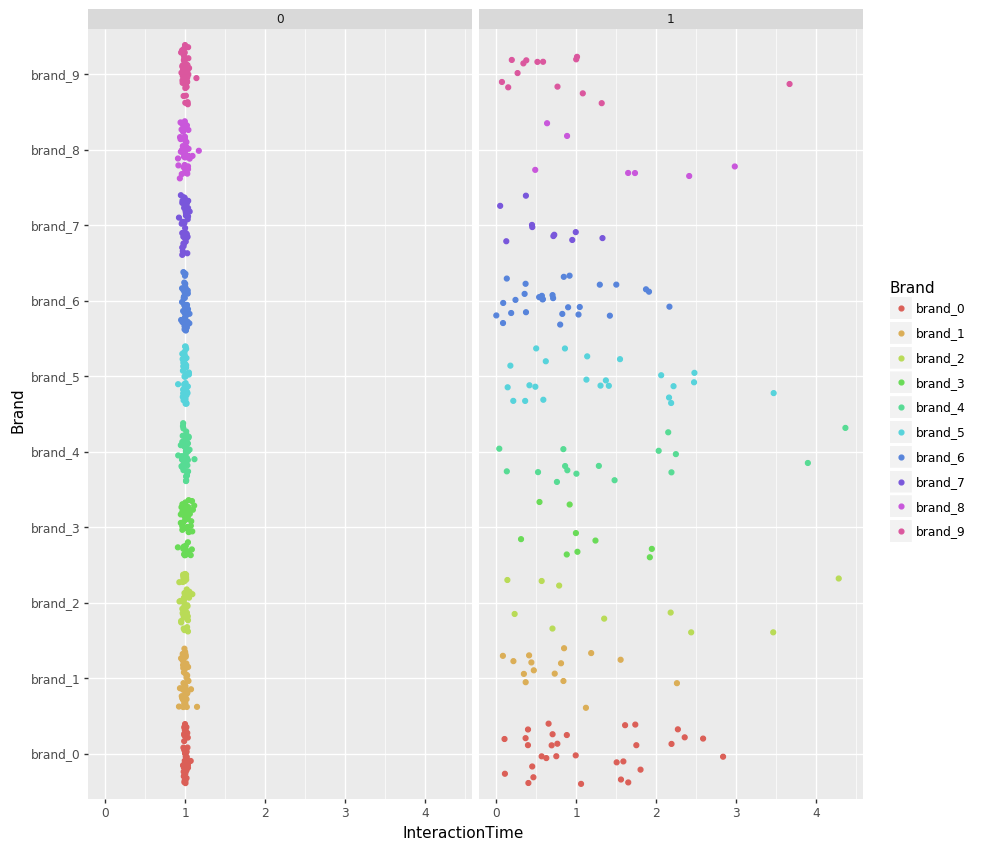

<ggplot: (-9223371893344864501)>

In [184]:
ggplot(agg_4,aes('Brand','InteractionTime',color='Brand'))+geom_jitter()+\
theme(figure_size=(10, 10))+coord_flip()+facet_wrap('~to_predict')

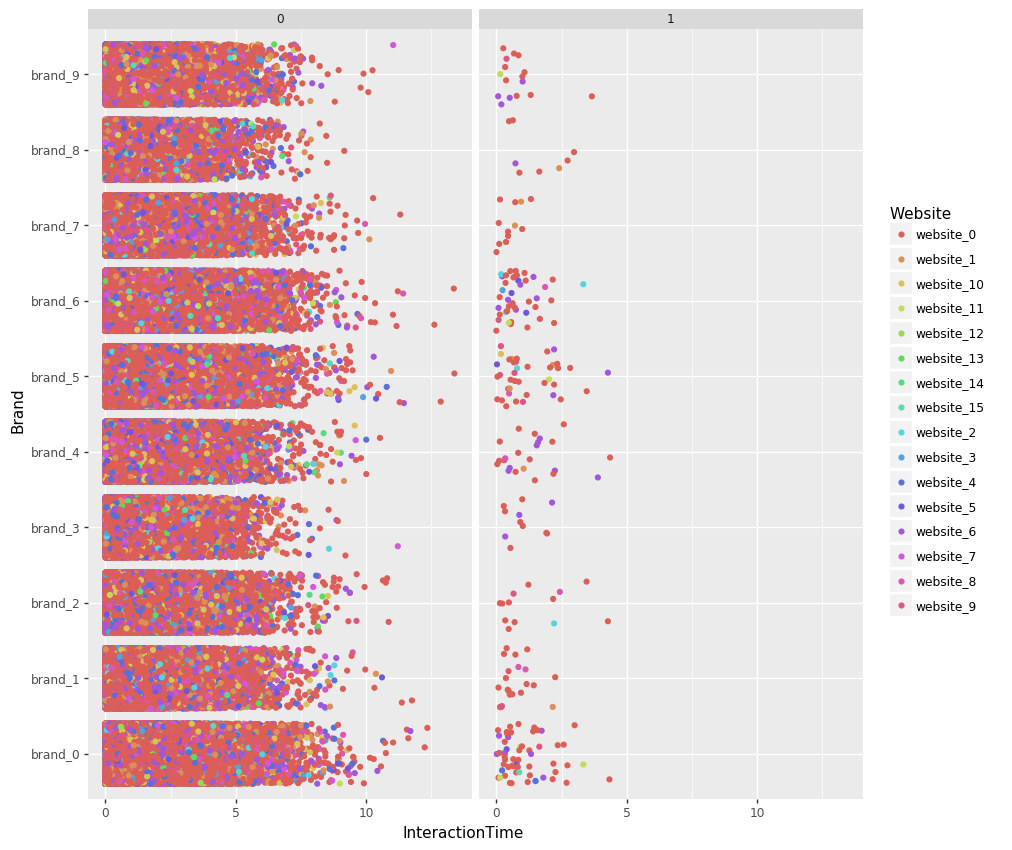

<ggplot: (143654385735)>

In [185]:
ggplot(sec_stackset,aes('Brand','InteractionTime',color='Website'))+geom_jitter()+\
theme(figure_size=(10, 10))+coord_flip()+facet_wrap('~to_predict')

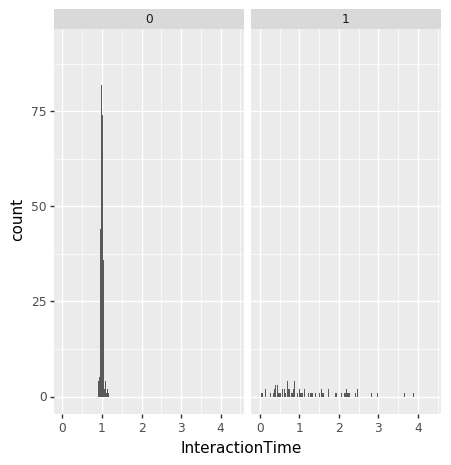

<ggplot: (-9223371893114328039)>

In [186]:
ggplot(agg_4,aes('InteractionTime'))+geom_histogram()+facet_wrap('~to_predict')+\
theme(figure_size=(5,5))

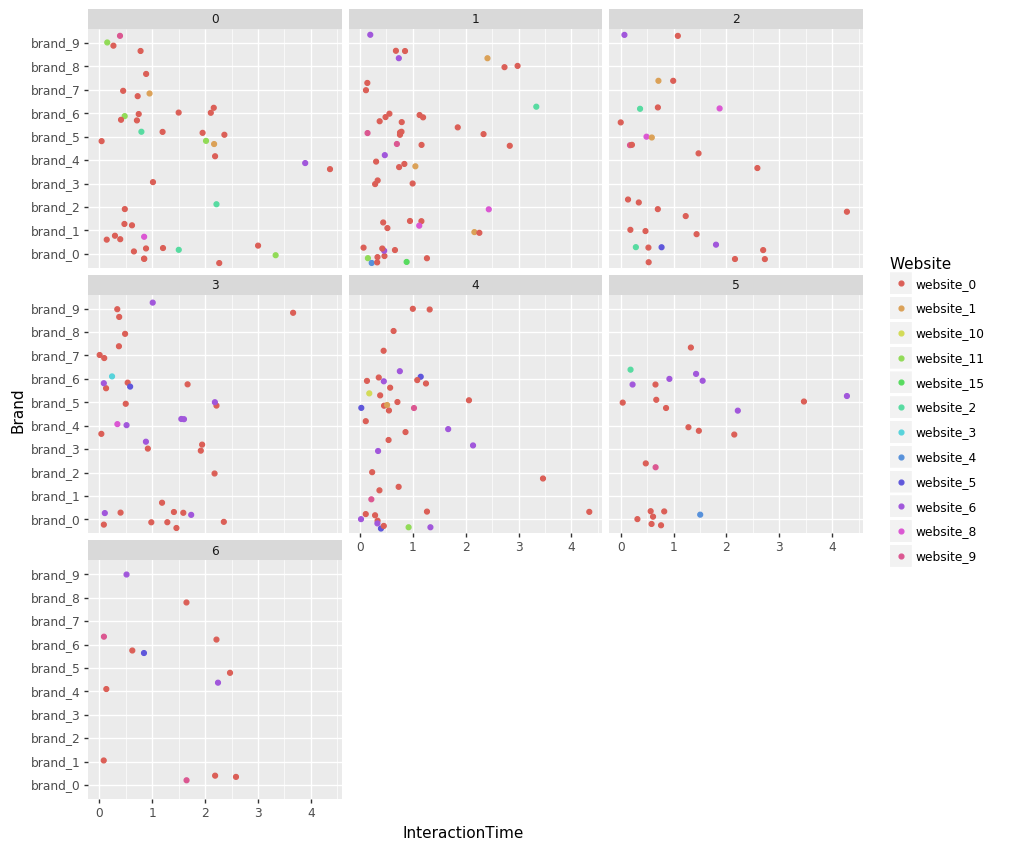

<ggplot: (143606972806)>

In [187]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('Brand','InteractionTime',color='Website'))+geom_jitter()+\
theme(figure_size=(10, 10))+coord_flip()+facet_wrap('~WeekDay')

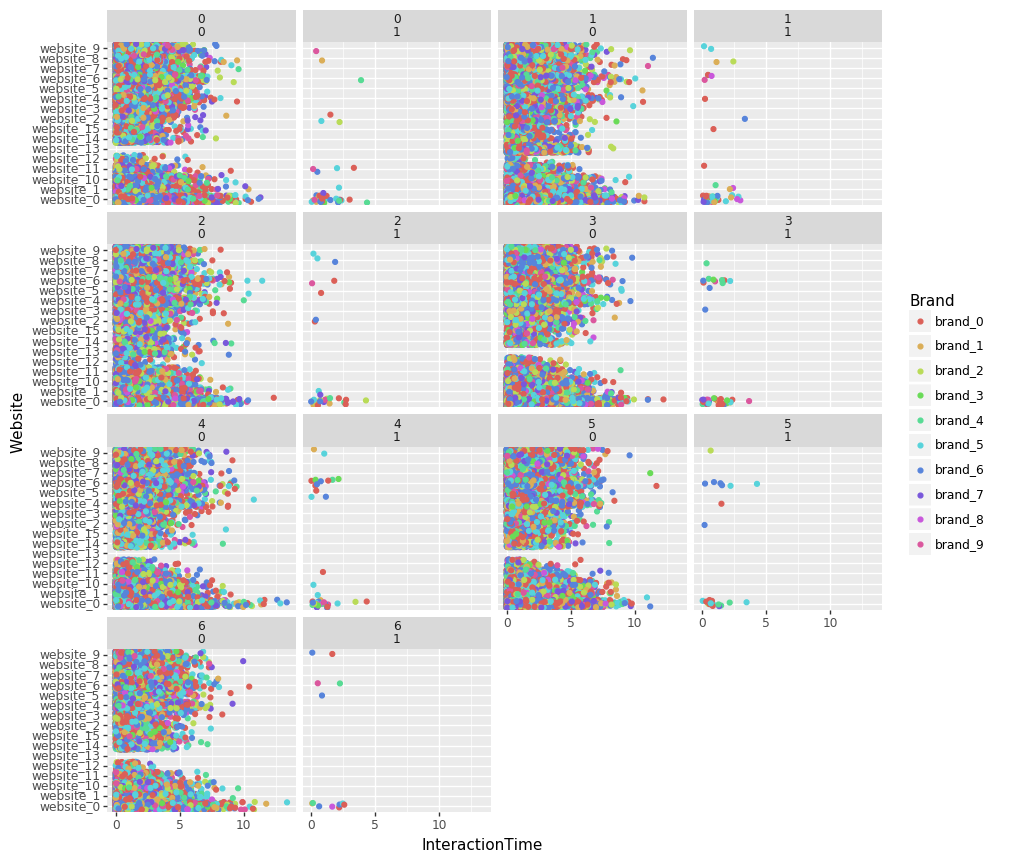

<ggplot: (143654404707)>

In [188]:
ggplot(sec_stackset,aes('Website','InteractionTime',color='Brand'))+geom_jitter()+\
theme(figure_size=(10, 10))+coord_flip()+facet_wrap('~WeekDay+to_predict')

In [189]:
agg_5=sec_stackset.groupby(['Brand','Website','WeekDay','Day','to_predict'])['InteractionTime'].mean().reset_index()

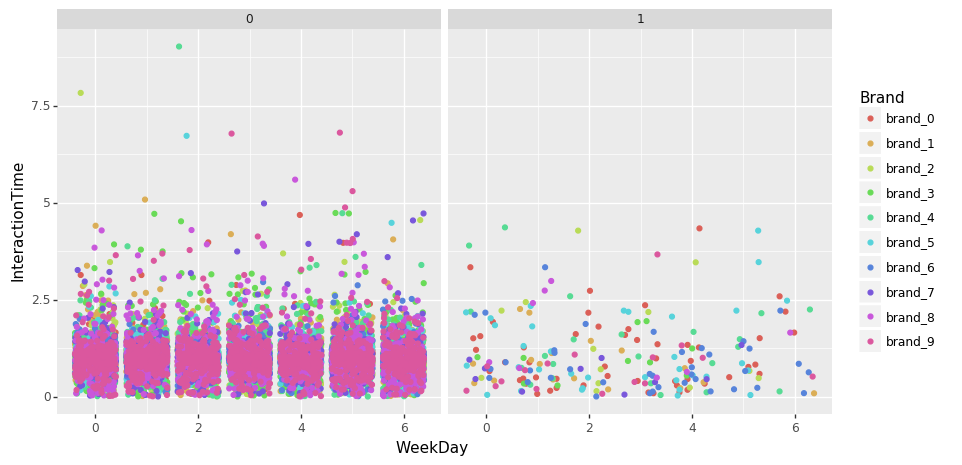

<ggplot: (-9223371893186151890)>

In [190]:
ggplot(agg_5,aes('WeekDay','InteractionTime',color='Brand'))+geom_jitter()+\
theme(figure_size=(10, 5))+facet_wrap('~to_predict')

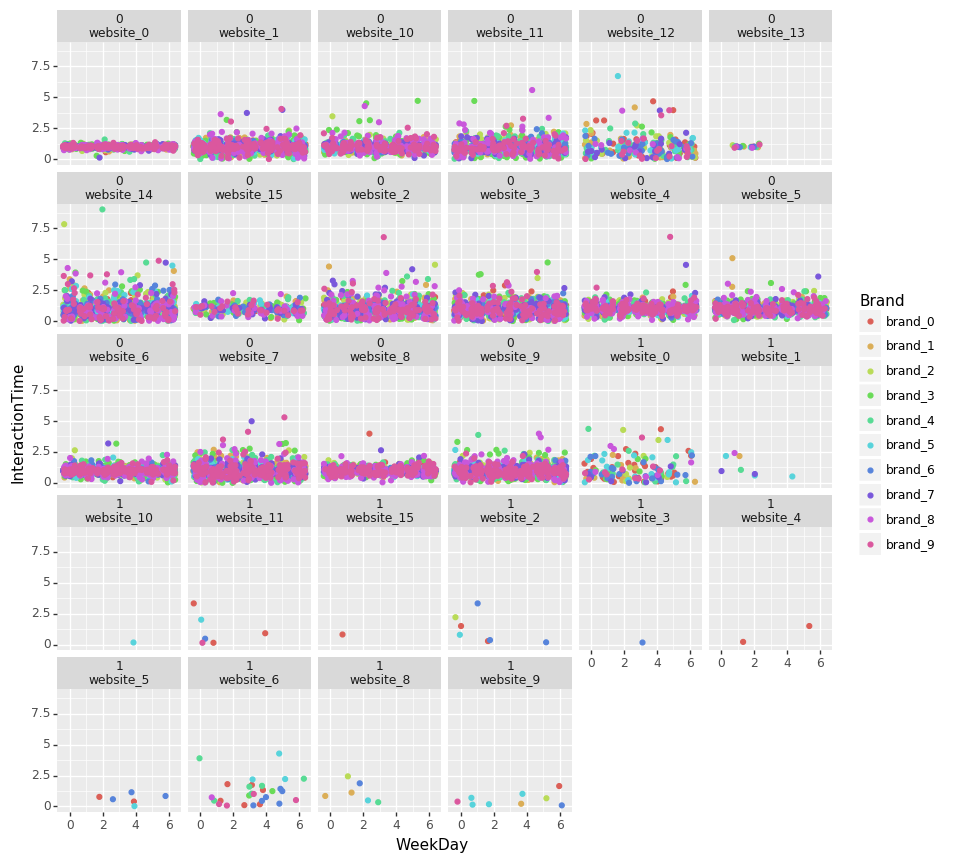

<ggplot: (143657457812)>

In [191]:
ggplot(agg_5,aes('WeekDay','InteractionTime',color='Brand'))+geom_jitter()+\
theme(figure_size=(10, 10))+facet_wrap('~to_predict+Website')

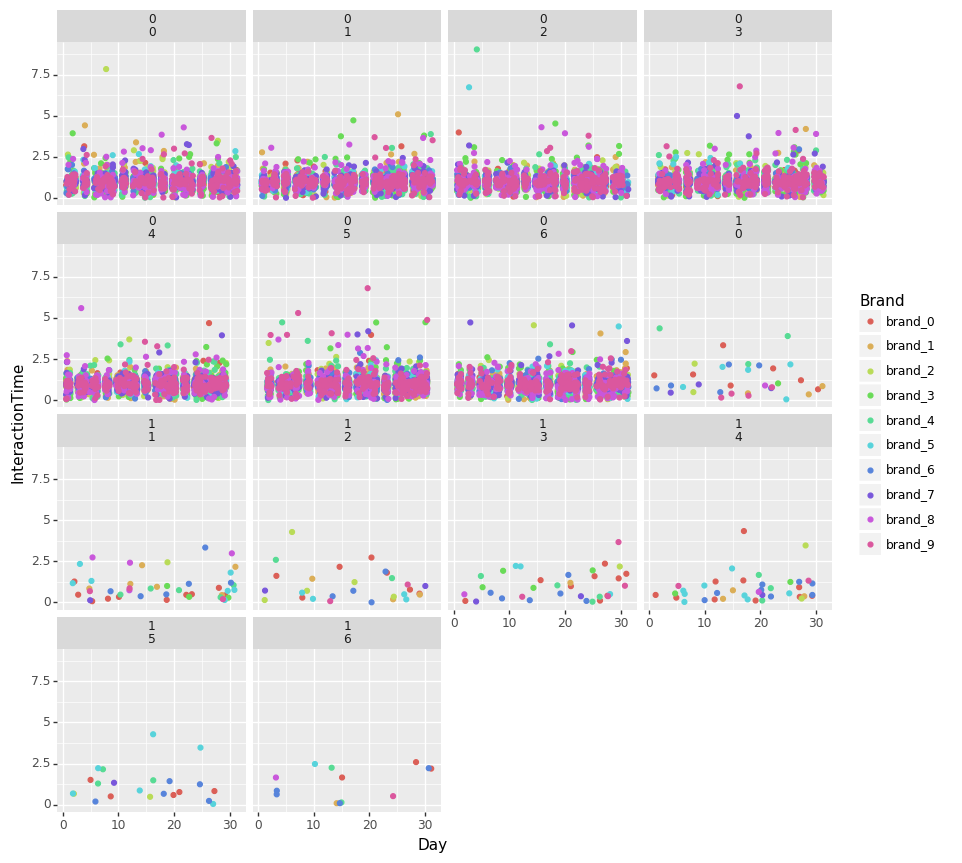

<ggplot: (143660910333)>

In [192]:
ggplot(agg_5,aes('Day','InteractionTime',color='Brand'))+geom_jitter()+\
theme(figure_size=(10, 10))+facet_wrap('~to_predict+WeekDay')

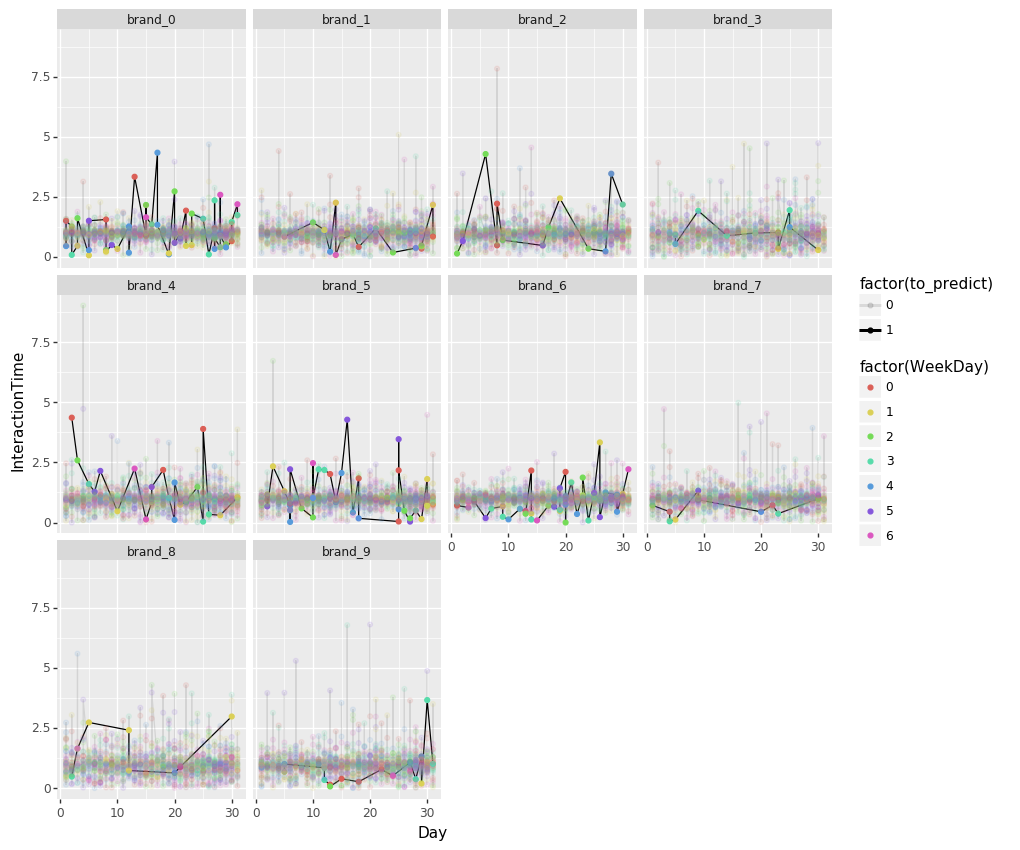

<ggplot: (-9223371893247526091)>

In [193]:
ggplot(agg_5,aes('Day','InteractionTime',show_legend=False,alpha='factor(to_predict)'))+geom_line()+\
theme(figure_size=(10,10))+\
geom_point(aes(color='factor(WeekDay)',show_legend=False))+facet_wrap('~Brand')

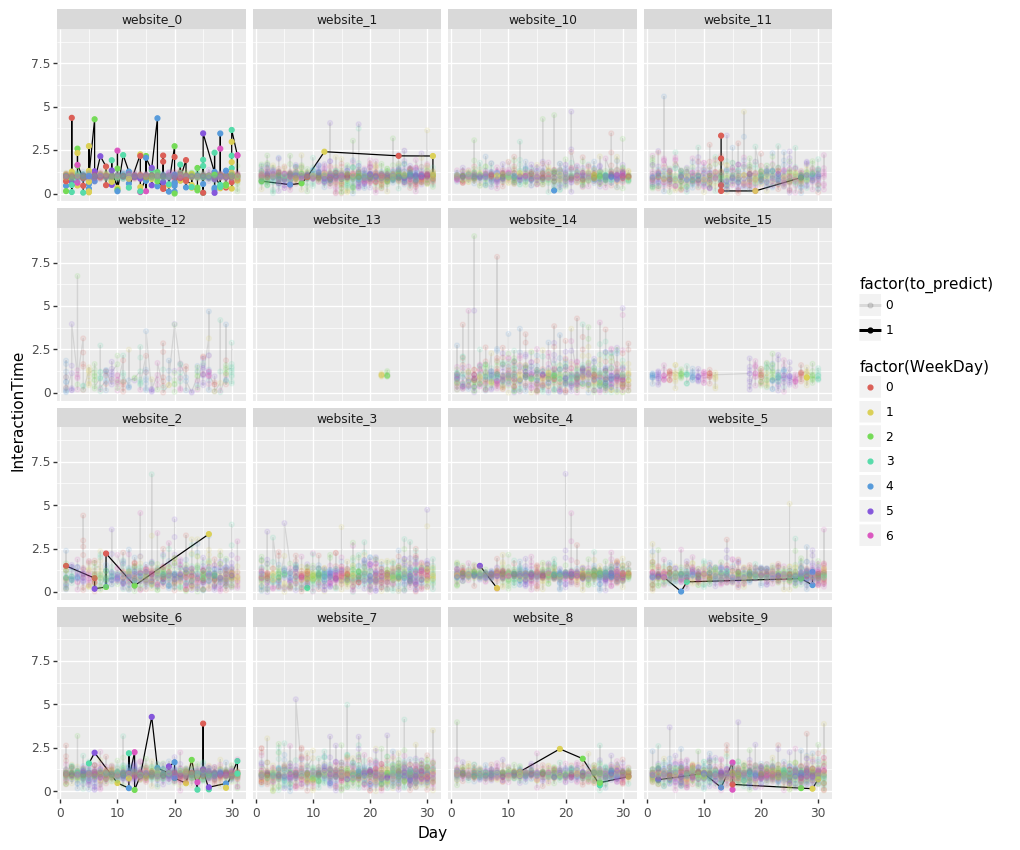

<ggplot: (-9223371893344932499)>

In [194]:
ggplot(agg_5,aes('Day','InteractionTime',show_legend=False,alpha='factor(to_predict)'))+geom_line()+\
theme(figure_size=(10,10))+\
geom_point(aes(color='factor(WeekDay)',show_legend=False))+facet_wrap('~Website')

In [195]:
sec_stackset.head()

ID    Website    Brand  colour  InteractionTime  \
0  AMsySZbNg8SBwPtj7IGHnip_8aY0  website_0  brand_0    Pink         0.171601   
1  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  website_0  brand_1     Red         4.303945   
2  AMsySZYoK8_bD0hGv4zu0iRn1TFo  website_0  brand_2  Yellow         0.868106   
3  AMsySZahxpwLOWnMJj6RGATgwEOc  website_0  brand_0  Yellow         0.802647   
4  AMsySZbqgfMBDtAqZz1jVRaOmX00  website_1  brand_3    Gold         0.627148   

   alexa_ranking_ca  alexa_ranking_com  Visits  to_predict  \
0               0.0                0.0      71           0   
1               0.0                0.0      13           0   
2               0.0                0.0       3           0   
3               0.0                0.0       2           0   
4               0.0                0.0      24           0   

                      TimeStamp  ...  Day  Hour  Minute  BannerWidth  \
0 2017-10-23 12:30:59.495365120  ...   23    12      30          300   
1 2017-08-16 01:37:49.736116992  ...   16     1      37          300   
2 2017-12-25 02:37:11.528120064  ...   25     2      37          728   
3 2018-01-09 19:59:12.591896064  ...    9    19      59          320   
4 2017-10-09 02:06:49.374044928  ...    9     2       6          300   

   BannerHeight USHoliday CAHoliday  UKHoliday  WeekDay  log_InteractionTime  
0           600         0         0          0        0            -1.762586  
1           250         0         0          0        2             1.459532  
2            90         1         1          1        0            -0.141442  
3            50         0         0          0        1            -0.219840  
4           250         1         1          0        0            -0.466572  

[5 rows x 22 columns]

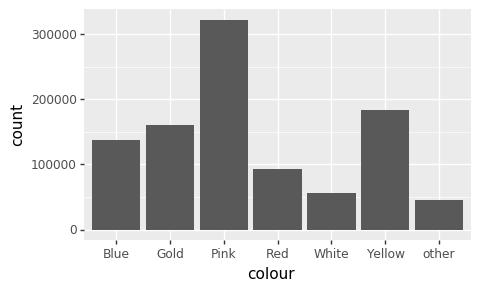

<ggplot: (-9223371893178775829)>

In [221]:
ggplot(sec_stackset,aes('colour'))+geom_bar()+theme(figure_size=(5,3))

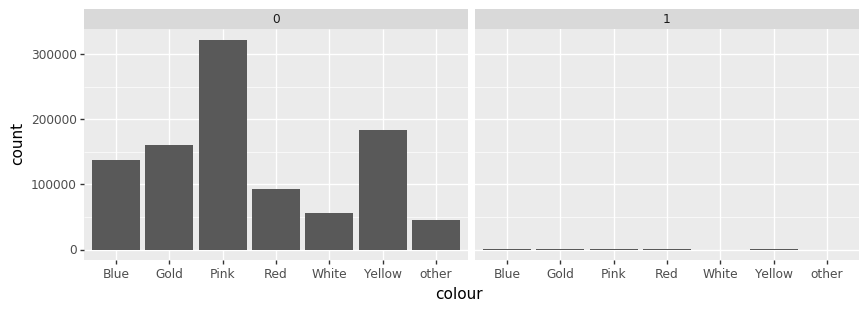

<ggplot: (143676030577)>

In [222]:
ggplot(sec_stackset,aes('colour'))+geom_bar()+facet_wrap('to_predict')+theme(figure_size=(10,3))

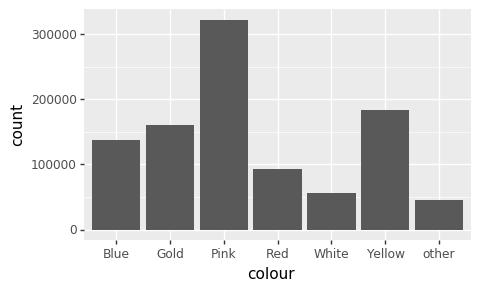

<ggplot: (-9223371893178805262)>

In [220]:
ggplot(sec_stackset[sec_stackset.to_predict==0],aes('colour'))+geom_bar()+theme(figure_size=(5,3))

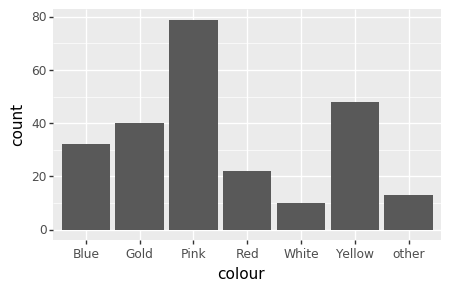

<ggplot: (-9223371893146157852)>

In [219]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('colour'))+geom_bar()+theme(figure_size=(5,3))

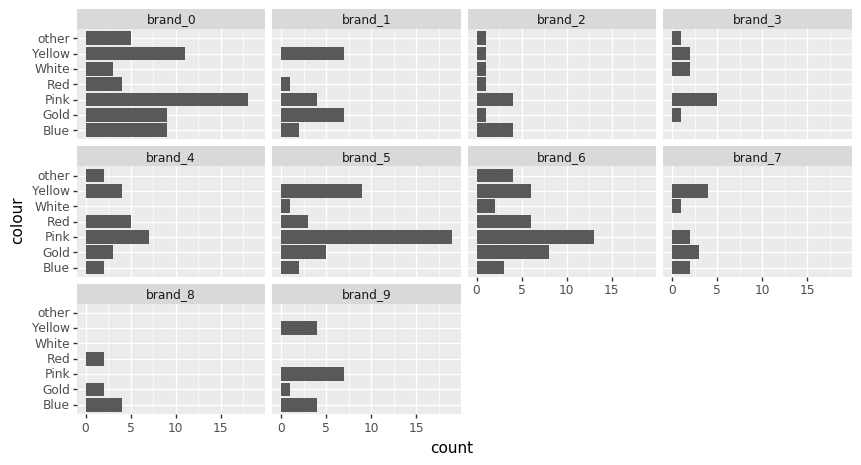

<ggplot: (-9223371893199917550)>

In [199]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('colour'))+geom_bar()+theme(figure_size=(10,5))+facet_wrap('~Brand')+\
coord_flip()

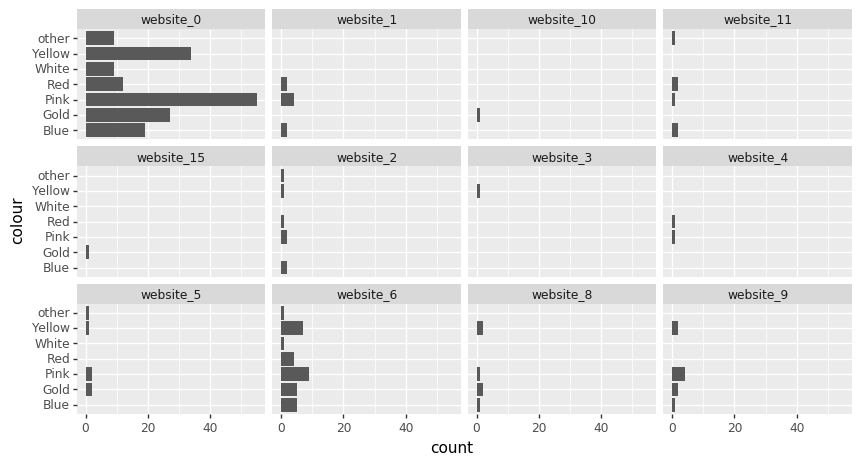

<ggplot: (143654741070)>

In [200]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('colour'))+geom_bar()+theme(figure_size=(10,5))+facet_wrap('~Website')+\
coord_flip()

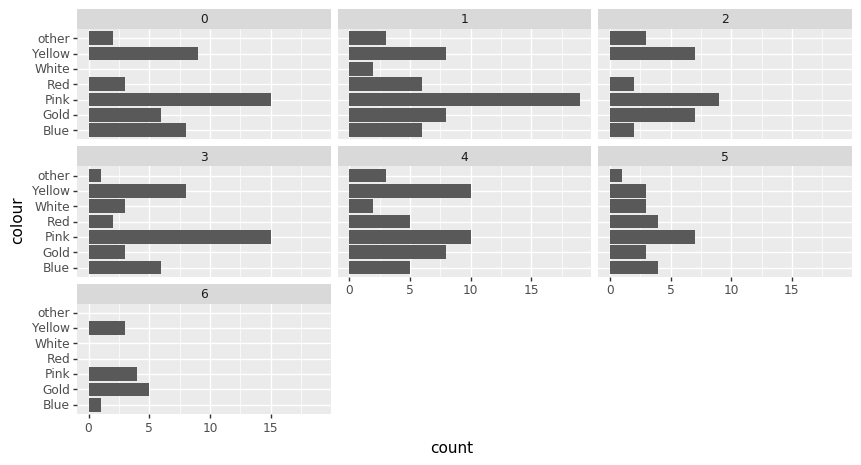

<ggplot: (-9223371893224385669)>

In [201]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('colour'))+geom_bar()+theme(figure_size=(10,5))+facet_wrap('~WeekDay')+\
coord_flip()

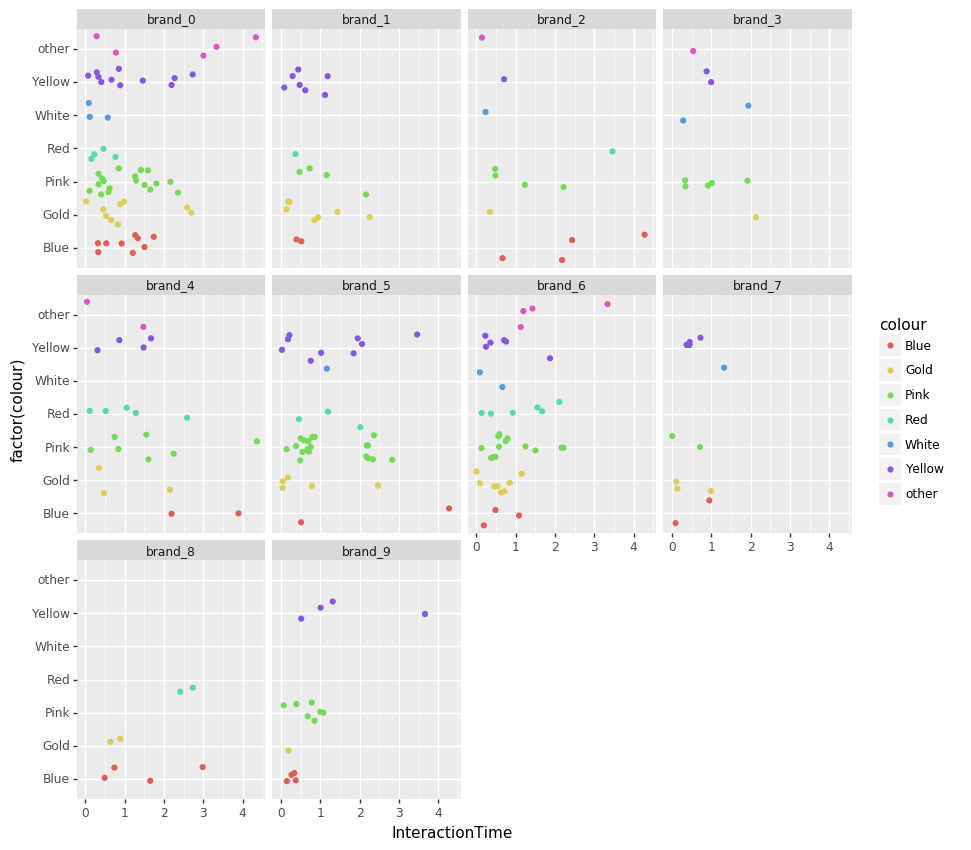

<ggplot: (143654779505)>

In [202]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('factor(colour)','InteractionTime',color='colour'))+geom_jitter()+\
theme(figure_size=(10,10))+facet_wrap('~Brand')+\
coord_flip()

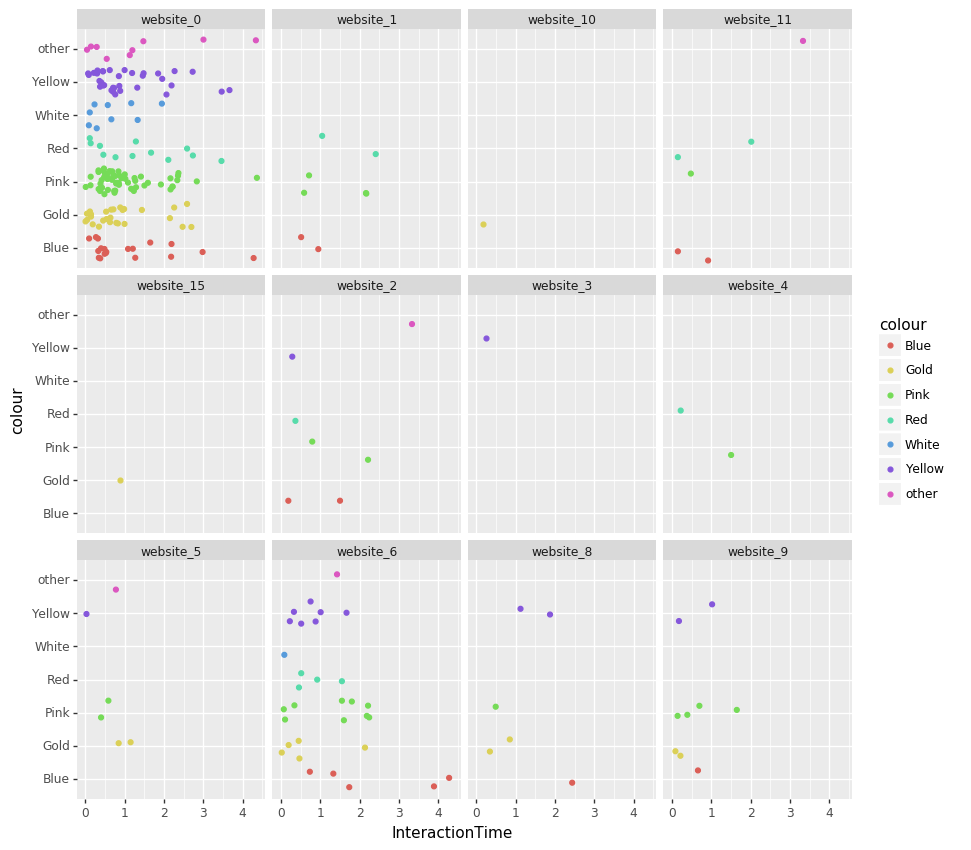

<ggplot: (143480565231)>

In [203]:
ggplot(sec_stackset[sec_stackset.to_predict==1],aes('colour','InteractionTime',color='colour'))+geom_jitter()+\
theme(figure_size=(10,10))+facet_wrap('~Website')+\
coord_flip()

# Scale and Dummify

In [204]:
sec_stackset.Visits

0          71
1          13
2           3
3           2
4          24
         ... 
999995    188
999996      1
999997      1
999998      4
999999     43
Name: Visits, Length: 1000000, dtype: int64

In [206]:
get_info(sec_stackset)

column  Missing  Duplicated  Unique            Type
0                    ID        0      781314  218686          object
1               Website        0      999984      16          object
2                 Brand        0      999990      10          object
3                colour        0      999993       7          object
4       InteractionTime        0         108  999892         float64
5      alexa_ranking_ca        0      999999       1         float64
6     alexa_ranking_com        0      999999       1         float64
7                Visits        0      999689     311           int64
8            to_predict        0      999998       2           int64
9             TimeStamp        0           3  999997  datetime64[ns]
10                 Year        0      999998       2           int64
11                Month        0      999993       7           int64
12                  Day        0      999969      31           int64
13                 Hour        0      999976      24           int64
14               Minute        0      999940      60           int64
15          BannerWidth        0      999990      10          object
16         BannerHeight        0      999988      12          object
17            USHoliday        0      999998       2           int64
18            CAHoliday        0      999998       2           int64
19            UKHoliday        0      999998       2           int64
20              WeekDay        0      999993       7           int64
21  log_InteractionTime        0         108  999892         float64

In [216]:
sec_stackset.to_csv(cleaned_data_folder+'/final_stackset.csv',index_label=[0])

In [214]:
sec_stackset

Unnamed: 0                            ID    Website    Brand  colour  \
0                0  AMsySZbNg8SBwPtj7IGHnip_8aY0  website_0  brand_0    Pink   
1                1  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  website_0  brand_1     Red   
2                2  AMsySZYoK8_bD0hGv4zu0iRn1TFo  website_0  brand_2  Yellow   
3                3  AMsySZahxpwLOWnMJj6RGATgwEOc  website_0  brand_0  Yellow   
4                4  AMsySZbqgfMBDtAqZz1jVRaOmX00  website_1  brand_3    Gold   
...            ...                           ...        ...      ...     ...   
999995      999995  AMsySZY-9Mzh_xjk57_PBNO_8QRO  website_1  brand_5  Yellow   
999996      999996  AMsySZY-KoDAx1qJv15SZ9lKO2QF  website_7  brand_6  Yellow   
999997      999997  AMsySZZGRYHeXVjPP2Rr6F-kjFc3  website_6  brand_6    Pink   
999998      999998  AMsySZaSAhXiCSGhaCLWcoLse-0i  website_0  brand_5    Pink   
999999      999999  AMsySZYRh7zkkDPtcrGdXEbM_M0f  website_5  brand_5    Pink   

        InteractionTime  alexa_ranking_ca  alexa_ranking_com  Visits  \
0              0.171601               0.0                0.0      71   
1              4.303945               0.0                0.0      13   
2              0.868106               0.0                0.0       3   
3              0.802647               0.0                0.0       2   
4              0.627148               0.0                0.0      24   
...                 ...               ...                ...     ...   
999995         0.049011               0.0                0.0     188   
999996         0.059118               0.0                0.0       1   
999997         0.025754               0.0                0.0       1   
999998         0.453710               0.0                0.0       4   
999999         2.411266               0.0                0.0      43   

        to_predict  ... Day  Hour  Minute  BannerWidth  BannerHeight  \
0                0  ...  23    12      30          300           600   
1                0  ...  16     1      37          300           250   
2                0  ...  25     2      37          728            90   
3                0  ...   9    19      59          320            50   
4                0  ...   9     2       6          300           250   
...            ...  ...  ..   ...     ...          ...           ...   
999995           0  ...  15    22      55          300           250   
999996           0  ...  24     2      17          320           480   
999997           0  ...  16     0       5          300           250   
999998           0  ...  27    15      55          300           250   
999999           0  ...  19    21       9        Other         Other   

        USHoliday CAHoliday UKHoliday  WeekDay  log_InteractionTime  
0               0         0         0        0            -1.762586  
1               0         0         0        2             1.459532  
2               1         1         1        0            -0.141442  
3               0         0         0        1            -0.219840  
4               1         1         0        0            -0.466572  
...           ...       ...       ...      ...                  ...  
999995          0         0         0        6            -3.015707  
999996          0         0         0        2            -2.828226  
999997          0         0         0        2            -3.659174  
999998          0         0         0        5            -0.790296  
999999          0         0         0        1             0.880152  

[1000000 rows x 23 columns]

In [217]:
sec_stackset=pd.read_csv(cleaned_data_folder+'/final_stackset.csv')
sec_stackset.drop(['0'],axis=1,inplace=True)